In [ ]:

import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

CSV_PATH="cleaned_songs.csv"
df=pd.read_csv(CSV_PATH)
random_seed=47

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df

,author,context,additional_context,song_title,song_text,source
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga
3,Владо Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga
...,...,...,...,...,...,...
1194,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ
1195,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ
1196,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ
1197,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ


author
Блаже Конески           182
Пијан Славеј            160
Ефтим Клетников         135
Славко Јаневски          70
Владо Урошевиќ           61
Катица Ќулавкова         60
Братислав Ташковски      55
Веле Смилевски           51
Ристо Лазаров            48
Адам Гајтани             47
Бранко Цветкоски         41
Петре М. Андреевски      41
Милош Линдро             40
Тодор Чаловски           31
Ацо Шопов                31
Анте Поповски            21
Гане Тодоровски          19
Богомил Ѓузел            19
Игор Исаковски           15
Матеја Матевски          14
Кочо Рацин               13
Лилјана Дирјан            7
Јосип Коцев               6
Ацо Караманов             4
Тихомир Јанчовски         4
Коле Неделковски          4
Видое Подгорец            3
Раде Силјан               3
Константин Миладинов      3
Цане Андреевски           2
Ванчо Николески           2
Никола Вапцаров           2
Рајко Жинзифов            1
Никола Маџиров            1
Јован Котески             1
Радован Павло

/tmp/ipykernel_901334/1049885675.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")


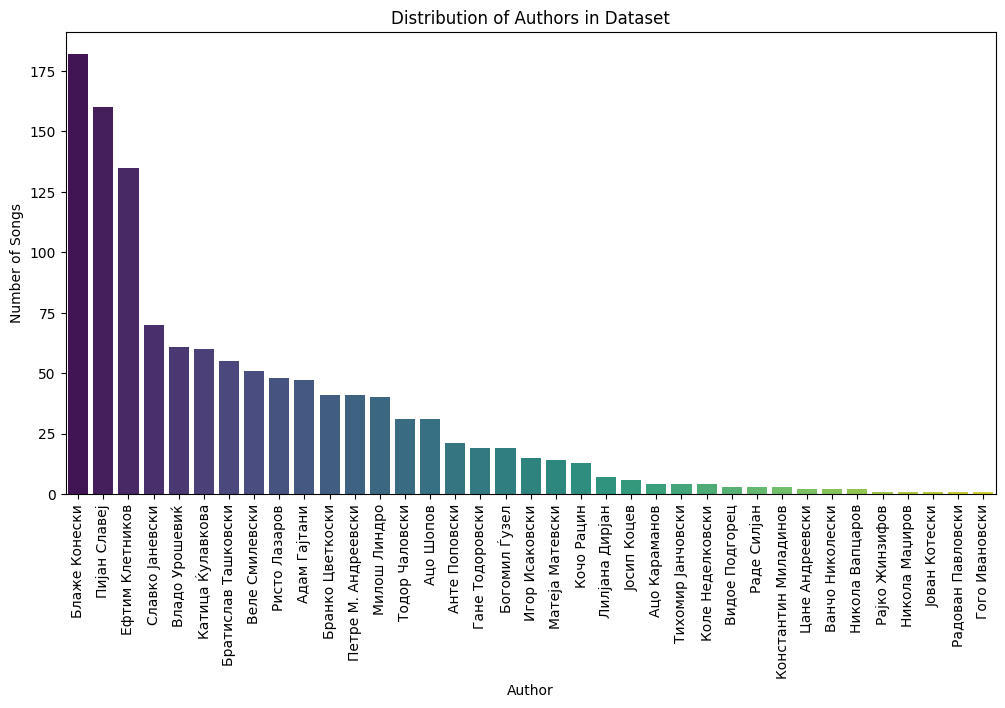

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


author_counts = df["author"].value_counts()

print(author_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Author")
plt.ylabel("Number of Songs")
plt.title("Distribution of Authors in Dataset")
plt.show()


In [4]:
len_df=df.copy()

len_df['char_count']=len_df['song_text'].str.len()
result_char = len_df.groupby("author")[["char_count"]].sum().reset_index().sort_values('char_count',ascending=False) 
result_char
    

,author,char_count
6,Блаже Конески,85707
28,Пијан Славеј,58934
7,Богомил Ѓузел,57509
16,Ефтим Клетников,56526
33,Славко Јаневски,54619
18,Катица Ќулавкова,51382
27,Петре М. Андреевски,45774
13,Владо Урошевиќ,33942
2,Адам Гајтани,32600
32,Ристо Лазаров,29858


In [5]:
len_df['word_count']=len_df['song_text'].str.split().str.len()
result_word = len_df.groupby("author")[["word_count"]].sum().reset_index().sort_values('word_count',ascending=False) 
result_word
    

,author,word_count
6,Блаже Конески,15589
28,Пијан Славеј,10701
16,Ефтим Клетников,9769
7,Богомил Ѓузел,9708
33,Славко Јаневски,9350
18,Катица Ќулавкова,8237
27,Петре М. Андреевски,8205
13,Владо Урошевиќ,5425
2,Адам Гајтани,5331
32,Ристо Лазаров,4763


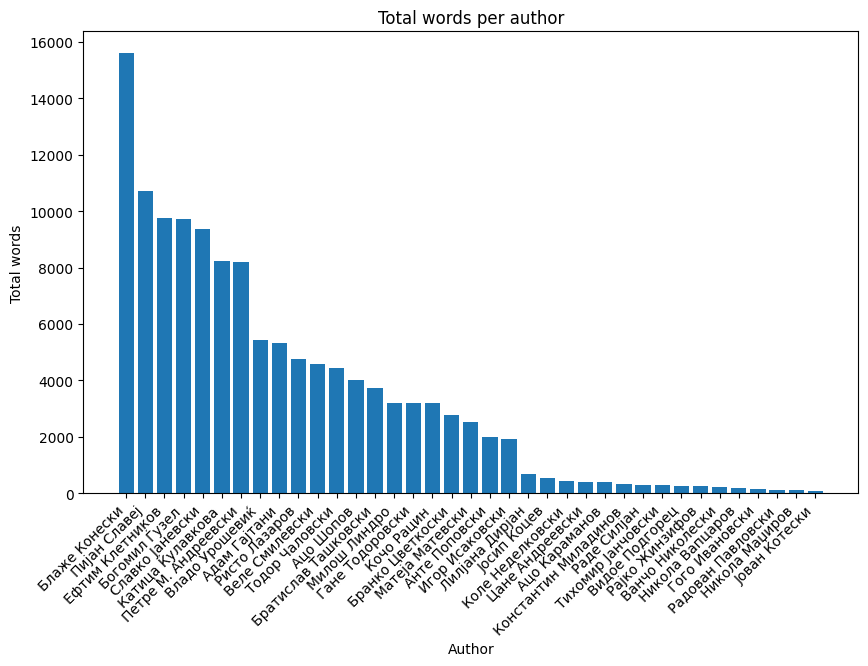

In [6]:
plt.figure(figsize=(10,6))
plt.bar(result_word["author"], result_word["word_count"])
plt.title("Total words per author")
plt.xlabel("Author")
plt.ylabel("Total words")
plt.xticks(rotation=45,ha='right')
plt.show()

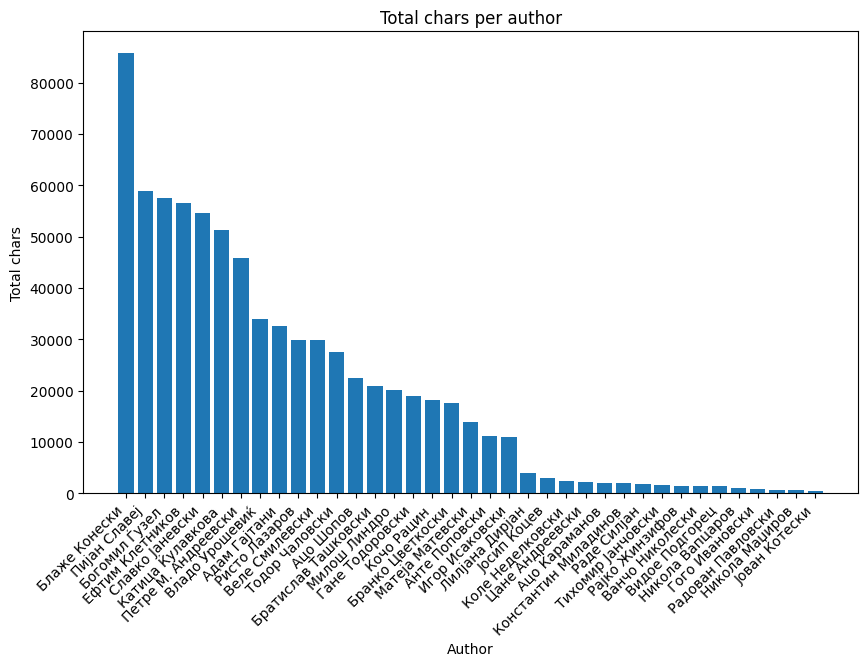

In [7]:
plt.figure(figsize=(10,6))
plt.bar(result_char["author"], result_char["char_count"])
plt.title("Total chars per author")
plt.xlabel("Author")
plt.ylabel("Total chars")
plt.xticks(rotation=45,ha='right')
plt.show()

In [8]:
print(f'Word count described:\n{len_df['word_count'].describe()}')
print(f'Total word count: {len_df['word_count'].sum()}')

Word count described:
count    1199.000000
mean      106.363636
std        97.029862
min         1.000000
25%        58.000000
50%        83.000000
75%       118.500000
max      1240.000000
Name: word_count, dtype: float64
Total word count: 127530


In [9]:
print(f'Char count described:\n{len_df['char_count'].describe()}')
print(f'Total char count: {len_df['char_count'].sum()}')

Char count described:
count    1199.000000
mean      621.750626
std       565.858197
min        57.000000
25%       329.000000
50%       492.000000
75%       703.500000
max      7430.000000
Name: char_count, dtype: float64
Total char count: 745479


Testing  of the models.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

def preprocess_data(df, test_size=0.3, random_state=47, min_samples=10):
    author_counts = df['author'].value_counts()
    valid_authors = author_counts[author_counts >= min_samples].index
    df_filtered = df[df['author'].isin(valid_authors)]
    df_filtered['song_text']=df_filtered['song_text'].str.lower()
    if len(df_filtered) < 2:
        raise ValueError("After filtering, dataset is too small for splitting")
    
    train, test = train_test_split(df_filtered, test_size=test_size, random_state=random_state, stratify=df_filtered['author'])
    train_x, train_y = train['song_text'], train['author']
    test_x, test_y = test['song_text'], test['author']
    print(f"Training samples: {len(train_x)}, Test samples: {len(test_x)}")
    print(f"Author distribution:\n{author_counts[valid_authors]}")
    
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
    X_train = vectorizer.fit_transform(train_x).toarray()
    X_test = vectorizer.transform(test_x).toarray()
    
    label_encoder = LabelEncoder()
    label_encoder.fit(df_filtered['author'])
    train_y_encoded = label_encoder.transform(train_y)
    mask = test_y.isin(train_y)
    X_test = X_test[mask.values]
    test_y = test_y[mask]
    test_y_encoded = label_encoder.transform(test_y)
    
    return X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer

def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 10)  
    neurons = trial.suggest_categorical("neurons", [64, 128, 256, 512])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    l2_reg = trial.suggest_float("l2_reg", 1e-5, 1e-2, log=True)  
    n_epochs=trial.suggest_int("n_epochs", 10, 100)  
    batch_size=trial.suggest_categorical("batch_size", [64, 128, 256, 512])
    n_folds = 3  
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=47)
    f1_scores = []

    for train_idx, val_idx in kf.split(X_train, train_y_encoded):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = train_y_encoded[train_idx], train_y_encoded[val_idx]

  
        model = keras.Sequential()
        model.add(layers.Input(shape=(X_train.shape[1],)))
        for _ in range(n_layers):
            model.add(layers.Dense(neurons, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
            model.add(layers.Dropout(dropout_rate))  
        model.add(layers.Dense(num_classes, activation="softmax"))

    
        if optimizer_name == "adam":
            optimizer = keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_name == "rmsprop":
            optimizer = keras.optimizers.RMSprop(learning_rate=lr)
        else:
            optimizer = keras.optimizers.SGD(learning_rate=lr)

        model.compile(
            optimizer=optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
        )

  
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )

        
        model.fit(
            X_tr, y_tr,
            validation_data=(X_val, y_val),
            epochs=n_epochs,  
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=0
        )

        y_pred = np.argmax(model.predict(X_val, verbose=0), axis=1)
        f1 = f1_score(y_val, y_pred, average="weighted")
        f1_scores.append(f1)

    return np.mean(f1_scores)


X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer = preprocess_data(df)
num_classes = len(label_encoder.classes_)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50,n_jobs=-1)  

print("Best F1 Score:", study.best_value)
print("Best hyperparameters:", study.best_params)


best_params = study.best_params
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
for _ in range(best_params['n_layers']):
    model.add(layers.Dense(best_params['neurons'], activation=best_params['activation'], kernel_regularizer=regularizers.l2(best_params['l2_reg'])))
    model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.Dense(num_classes, activation="softmax"))

if best_params['optimizer'] == "adam":
    optimizer = keras.optimizers.Adam(learning_rate=best_params['lr'])
elif best_params['optimizer'] == "rmsprop":
    optimizer = keras.optimizers.RMSprop(learning_rate=best_params['lr'])
else:
    optimizer = keras.optimizers.SGD(learning_rate=best_params['lr'])

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=best_params['n_epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[early_stopping],
)

y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
cm = confusion_matrix(test_y_encoded, y_pred, normalize='true')

num_classes = len(label_encoder.classes_)
figsize = (max(15, num_classes * 0.8), max(12, num_classes * 0.8))  
annot_font_size = max(6, 12 - num_classes * 0.15)  
label_font_size = max(8, 14 - num_classes * 0.15)  

wrapped_labels = [textwrap.fill(label, 15) for label in label_encoder.classes_]


cm = confusion_matrix(test_y_encoded, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu_r",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



/tmp/ipykernel_901334/2778960816.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['song_text']=df_filtered['song_text'].str.lower()


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-24 21:38:17,818] A new study created in memory with name: no-name-caa7a028-b17a-43ac-8031-29d6e0d45a66
[I 2025-09-24 21:38:52,994] Trial 4 finished with value: 0.12172160926770344 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.12548249988742388, 'optimizer': 'rmsprop', 'lr': 0.0003715481150892653, 'l2_reg': 4.178914993722468e-05, 'n_epochs': 13, 'batch_size': 512}. Best is trial 4 with value: 0.12172160926770344.
[I 2025-09-24 21:39:12,818] Trial 3 finished with value: 0.5473097380915345 and parameters: {'n_layers': 3, 'neurons': 512, 'activation': 'tanh', 'dropout_rate': 0.449004603291299, 'optimizer': 'adam', 'lr': 0.00576758716520292, 'l2_reg': 4.029871597670905e-05, 'n_epochs': 83, 'batch_size': 64}. Best is trial 3 with value: 0.5473097380915345.
[I 2025-09-24 21:39:13,263] Trial 12 finished with value: 0.0746535637238149 and parameters: {'n_layers': 4, 'neurons': 128, 'activation': 'elu', 'dropout_rate': 0.37231578998230064, 'op

TF IDF LSTM

Analysis, tryint to calculate author effectivness.

In [3]:

results_df = df.groupby('author').agg(
    char_count=('song_text', lambda x: x.str.len().sum()),
    word_count=('song_text', lambda x: x.str.split().str.len().sum()),
    num_songs=('song_text', 'count')
).reset_index()

f1_dict = dict(zip(authors, f1_per_author))

results_df['f1_score'] = results_df['author'].map(f1_dict)

missing_f1 = results_df[results_df['f1_score'].isna()]['author'].tolist()
if missing_f1:
    print(f"Warning: No F1 scores for authors: {missing_f1}")

max_songs = results_df['num_songs'].max()
max_words = results_df['word_count'].max()
max_chars = results_df['char_count'].max()

results_df['norm_songs'] = results_df['num_songs'] / max_songs
results_df['norm_words'] = results_df['word_count'] / max_words
results_df['norm_chars'] = results_df['char_count'] / max_chars



results_df['expressiveness'] = results_df['f1_score'] / results_df['norm_words']

results_df['expressiveness'] = results_df['expressiveness'].replace([np.inf, -np.inf], np.nan)

if results_df['expressiveness'].notna().any():  
    expr_min = results_df['expressiveness'].min()
    expr_max = results_df['expressiveness'].max()
    if expr_max != expr_min: 
        results_df['expressiveness_normalized'] = (
            (results_df['expressiveness'] - expr_min) / (expr_max - expr_min)
        )
    else:
    
        results_df['expressiveness_normalized'] = 0
else:
    
    results_df['expressiveness_normalized'] = np.nan


results_df = results_df.sort_values(by='expressiveness_normalized', ascending=False, na_position='last')


results_df

NameError: name 'authors' is not defined

In [ ]:
import os
# -----------------------------
# GPU configuration (must be first)
# -----------------------------
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')  # halve memory usage

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print("GPU memory growth enabled with mixed precision")

# -----------------------------
# Imports
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from optuna.pruners import MedianPruner
CSV_PATH = "cleaned_songs.csv"
df = pd.read_csv(CSV_PATH)
random_seed = 47
df.loc[:, 'song_text'] = df['song_text'].str.lower()


def preprocess_data(df, test_size=0.3, random_state=47, min_samples=10, max_features=2000):
    # Filter authors with enough samples
    author_counts = df['author'].value_counts()
    valid_authors = author_counts[author_counts >= min_samples].index
    df_filtered = df[df['author'].isin(valid_authors)]

    
    if len(df_filtered) < 2:
        raise ValueError("Dataset too small after filtering")

    train, test = train_test_split(
        df_filtered, test_size=test_size, random_state=random_state, stratify=df_filtered['author']
    )
    train_x, train_y = train['song_text'], train['author']
    test_x, test_y = test['song_text'], test['author']
    
    print(f"Training samples: {len(train_x)}, Test samples: {len(test_x)}")
    print(f"Author distribution:\n{author_counts[valid_authors]}")

    vectorizer = TfidfVectorizer(
        max_features=max_features, ngram_range=(1, 2), min_df=2, max_df=0.8
    )
    X_train = vectorizer.fit_transform(train_x).toarray()
    X_test = vectorizer.transform(test_x).toarray()

    label_encoder = LabelEncoder()
    label_encoder.fit(df_filtered['author'])
    train_y_encoded = label_encoder.transform(train_y)
    
    mask = test_y.isin(train_y)
    X_test = X_test[mask.values]
    test_y = test_y[mask]
    test_y_encoded = label_encoder.transform(test_y)
    
    return X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer


X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer = preprocess_data(df)
num_classes = len(label_encoder.classes_)


def objective(trial):
    # -----------------------------
    # Hyperparameters (GPU-safe)
    # -----------------------------
    max_features = trial.suggest_categorical("max_features", [500, 1000, 2000, 3000])
    n_layers = trial.suggest_int("n_layers", 1, 4)          
    neurons = trial.suggest_int("neurons", 128, 1024)       
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.4)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    l2_reg = trial.suggest_float("l2_reg", 1e-5, 1e-2, log=True)
    n_epochs = trial.suggest_int("n_epochs", 10, 50)
    batch_size = 32  # safe
    
    # -----------------------------
    # Preprocess TF-IDF with variable max_features
    # -----------------------------
    X_tr_raw, X_val_raw, y_tr, y_val, _, _ = preprocess_data(
        df, test_size=0.3, random_state=random_seed, min_samples=10, max_features=max_features
    )

    # For LSTM, reshape to (batch, time, features)
    X_tr = np.expand_dims(X_tr_raw, axis=1)
    X_val = np.expand_dims(X_val_raw, axis=1)

    # -----------------------------
    # Build GPU-safe model
    # -----------------------------
    model = keras.Sequential()
    model.add(layers.Input(shape=(1, X_tr.shape[2])))

    # Optional dense for dimensionality reduction
    if X_tr.shape[2] > 1024:
        reduced_dim = 1024
        model.add(layers.Dense(reduced_dim, activation="relu"))
        model.add(layers.Reshape((1, reduced_dim)))

    for i in range(n_layers):
        return_sequences = i < n_layers - 1
        model.add(layers.LSTM(
            neurons,
            activation=activation,
            kernel_regularizer=regularizers.l2(l2_reg),
            return_sequences=return_sequences
        ))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(num_classes, activation="softmax"))

    optimizer = {
        "adam": keras.optimizers.Adam(learning_rate=lr),
        "rmsprop": keras.optimizers.RMSprop(learning_rate=lr),
        "sgd": keras.optimizers.SGD(learning_rate=lr)
    }[optimizer_name]

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    # -----------------------------
    # Training
    # -----------------------------
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=3, restore_best_weights=True
    )

    model.fit(
        X_tr, y_tr,
        validation_data=(X_val, y_val),
        epochs=n_epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=0
    )

    y_pred = np.argmax(model.predict(X_val, verbose=0), axis=1)
    return f1_score(y_val, y_pred, average="weighted")


# -----------------------------
# Optuna Study
# -----------------------------
study = optuna.create_study(
    study_name="tfidf_lstm_gpu_safe_1",
    storage="sqlite:///optuna_study.db",
    direction="maximize",
    load_if_exists=True,
    pruner=MedianPruner(n_warmup_steps=5)
)
study.optimize(objective, n_trials=50, n_jobs=1)

print("Best F1 Score:", study.best_value)
print("Best hyperparameters:", study.best_params)


[I 2025-09-27 17:27:38,116] Using an existing study with name 'tfidf_lstm_gpu_safe_1' instead of creating a new one.


GPU memory growth enabled with mixed precision
Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64
Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо 

2025-09-27 17:27:39.435871: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:27:42.444092: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 4 bytes spill stores, 4 bytes spill loads

[I 2025-09-27 17:27:50,634] Trial 15 finished with value: 0.5666130336307661 and parameters: {'max_features': 3000, 'n_layers': 1, 'neurons': 546, 'activation': 'elu', 'dropout_rate': 0.2917674372133438, 'optimizer': 'rmsprop', 'lr': 0.0003027704897076343, 'l2_reg': 2.9055613319330668e-05, 'n_epochs': 29}. Best is trial 15 with value: 0.5666130336307661.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:27:51.906685: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:27:51.906798: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:27:52.356932: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37', 56 bytes spill stores, 56 bytes spill loads

2025-09-27 17:27:52.814454: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:28:06.970839: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:28:06.970873: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:28:07.246996: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 12 bytes spill stores, 12 bytes spill loads

2025-09-27 17:28:07.316794: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:28:19.925145: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:28:19.925171: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:28:20.804996: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_71', 4 bytes spill stores, 4 bytes spill loads

2025-09-27 17:28:23.612479: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Reg

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:28:39,488] Trial 19 finished with value: 0.0433710410483605 and parameters: {'max_features': 3000, 'n_layers': 1, 'neurons': 376, 'activation': 'tanh', 'dropout_rate': 0.39955381232760634, 'optimizer': 'rmsprop', 'lr': 0.00010643629642794546, 'l2_reg': 0.005516103006033854, 'n_epochs': 18}. Best is trial 15 with value: 0.5666130336307661.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:28:41.652005: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:28:41.652031: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:28:41.912195: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58', 8 bytes spill stores, 8 bytes spill loads

2025-09-27 17:28:42.391823: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Reg

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:28:54.843076: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:28:55.542744: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 220 bytes spill stores, 220 bytes spill loads

2025-09-27 17:28:57.318365: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:29:00.050839: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12', 276 bytes

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:29:05.131792: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:29:05.828121: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 220 bytes spill stores, 220 bytes spill loads

2025-09-27 17:29:07.846282: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:29:10.634193: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12', 276 bytes

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:29:15.653931: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:29:16.311165: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 220 bytes spill stores, 220 bytes spill loads

2025-09-27 17:29:18.252085: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:29:21.060394: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12', 276 bytes

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:29:26.798608: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:29:26.798646: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:29:27.009035: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:29:27.188343: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:29:40.053797: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:29:40.053842: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:29:40.843794: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 220 bytes spill stores, 220 bytes spill loads

2025-09-27 17:29:41.110744: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning :

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:29:53.132491: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:29:53.132536: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:29:53.948377: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 220 bytes spill stores, 220 bytes spill loads

2025-09-27 17:29:54.194808: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning :

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:30:07.314101: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:30:07.314223: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:30:07.314243: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:30:07.570939: I external/l

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:30:23.552586: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:30:23.552623: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:30:23.801574: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:30:23.848176: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:30:38,082] Trial 29 finished with value: 0.41545430176146814 and parameters: {'max_features': 1000, 'n_layers': 2, 'neurons': 288, 'activation': 'tanh', 'dropout_rate': 0.2637704966074339, 'optimizer': 'rmsprop', 'lr': 0.002791506913512128, 'l2_reg': 7.576606219724133e-05, 'n_epochs': 30}. Best is trial 23 with value: 0.6168886662939528.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:30:40.163323: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:30:40.381267: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:30:40.690318: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 76 bytes spill stores, 76 bytes spill loads

2025-09-27 17:30:42.475757: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 4 bytes spi

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:30:50.400910: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:30:50.400945: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:30:50.639182: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:30:50.766860: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:31:02.263037: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:31:02.721575: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:31:02.807933: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 12 bytes spill stores, 12 bytes spill loads

2025-09-27 17:31:03.030440: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 76 bytes sp

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:31:12.447286: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:31:12.447330: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:31:12.791879: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 12 bytes spill stores, 12 bytes spill loads

2025-09-27 17:31:13.187662: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:31:25.205232: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:31:25.205267: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:31:25.779131: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 76 bytes spill stores, 76 bytes spill loads

2025-09-27 17:31:26.113584: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:31:37.838237: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:31:37.838346: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:31:37.838361: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:31:38.513947: I external/l

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:31:54.174017: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
[I 2025-09-27 17:32:03,608] Trial 36 finished with value: 0.6022815376637223 and parameters: {'max_features': 1000, 'n_layers': 1, 'neurons': 239, 'activation': 'elu', 'dropout_rate': 0.2253070079791818, 'optimizer': 'rmsprop', 'lr': 0.002037273120334908, 'l2_reg': 0.0003517716735334362, 'n_epochs': 32}. Best is trial 33 with value: 0.6215347953519528.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:32:05.355617: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:32:05.355732: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:32:05.355747: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:32:06.075607: I external/l

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:32:26,424] Trial 38 finished with value: 0.10813598767099573 and parameters: {'max_features': 500, 'n_layers': 3, 'neurons': 403, 'activation': 'tanh', 'dropout_rate': 0.31082434233657347, 'optimizer': 'rmsprop', 'lr': 0.0010449383000449744, 'l2_reg': 9.106353188028265e-05, 'n_epochs': 31}. Best is trial 33 with value: 0.6215347953519528.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:32:27.795519: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:32:28.059266: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:32:28.116588: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 12 bytes spill stores, 12 bytes spill loads

2025-09-27 17:32:28.360555: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 76 bytes sp

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:32:40.335382: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:32:40.335620: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:32:40.335636: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:32:40.950128: I external/l

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:33:01.205963: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:33:01.205990: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:33:01.426559: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_105', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:33:01.530294: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : 

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:33:14.102802: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:33:14.355525: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:33:14.373267: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 12 bytes spill stores, 12 bytes spill loads

[I 2025-09-27 17:33:22,721] Trial 42 finished with value: 0.6198415527437684 and parameters: {'max_features': 1000, 'n_layers': 1, 'neurons': 180, 'activation': 'elu', 'dropout_rate': 0.22785081361435627,

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:33:23.797720: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
[I 2025-09-27 17:33:31,042] Trial 43 finished with value: 0.6224116928874801 and parameters: {'max_features': 1000, 'n_layers': 1, 'neurons': 131, 'activation': 'elu', 'dropout_rate': 0.24712936652438758, 'optimizer': 'rmsprop', 'lr': 0.003721903454333524, 'l2_reg': 0.00019134359816619452, 'n_epochs': 10}. Best is trial 43 with value: 0.6224116928874801.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:33:32.130605: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:33:32.363268: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 16 bytes spill stores, 16 bytes spill loads

2025-09-27 17:33:32.456561: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 12 bytes spill stores, 12 bytes spill loads

[I 2025-09-27 17:33:39,033] Trial 44 finished with value: 0.6008757272576679 and parameters: {'max_features': 1000, 'n_layers': 1, 'neurons': 168, 'activation': 'elu', 'dropout_rate': 0.2359879648639694, 

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:33:40.252418: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
[I 2025-09-27 17:33:48,243] Trial 45 finished with value: 0.6245445354786161 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 178, 'activation': 'elu', 'dropout_rate': 0.17364965319523504, 'optimizer': 'rmsprop', 'lr': 0.005892619468489725, 'l2_reg': 0.00022251133836792176, 'n_epochs': 13}. Best is trial 45 with value: 0.6245445354786161.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 17:33:50.577003: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-27 17:33:50.577027: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
[I 2025-09-27 17:34:01,874] Trial 46 finished with value: 0.11192177942687687 and parameters: {'max_features': 2000, 'n_layers': 3, 'neurons': 190, 'activation': 'elu', 'dropout_rate': 0.14403755162960596, 'optimizer': 'rmsprop', 'lr': 0.0063031227102781275, 'l2_reg': 0.00023849142097937803, 'n_epochs': 10}. Best is trial 45 with value: 0.6245445354786161.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:05,405] Trial 47 finished with value: 0.6622697641951448 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 130, 'activation': 'tanh', 'dropout_rate': 0.17494394810719216, 'optimizer': 'rmsprop', 'lr': 0.006661948772102036, 'l2_reg': 0.0003831880824703725, 'n_epochs': 14}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:08,728] Trial 48 finished with value: 0.616875840910466 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 139, 'activation': 'tanh', 'dropout_rate': 0.17910309992691947, 'optimizer': 'rmsprop', 'lr': 0.006816188558522215, 'l2_reg': 0.0007192682315232008, 'n_epochs': 13}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:11,958] Trial 49 finished with value: 0.6163034262337712 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 224, 'activation': 'tanh', 'dropout_rate': 0.15952790951596413, 'optimizer': 'adam', 'lr': 0.005234951237068217, 'l2_reg': 0.0013317723072741243, 'n_epochs': 13}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:16,179] Trial 50 finished with value: 0.12378820326824914 and parameters: {'max_features': 2000, 'n_layers': 2, 'neurons': 279, 'activation': 'tanh', 'dropout_rate': 0.14593325325094705, 'optimizer': 'rmsprop', 'lr': 0.0040700455915749474, 'l2_reg': 0.00040630234178787815, 'n_epochs': 15}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:24,663] Trial 51 finished with value: 0.0433710410483605 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 186, 'activation': 'tanh', 'dropout_rate': 0.18497425533629547, 'optimizer': 'sgd', 'lr': 0.0034328329867809406, 'l2_reg': 0.0003076403935163904, 'n_epochs': 44}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:32,476] Trial 52 finished with value: 0.6347039094058093 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 139, 'activation': 'elu', 'dropout_rate': 0.11264168381235559, 'optimizer': 'rmsprop', 'lr': 0.009689656902814238, 'l2_reg': 0.00018962704416790584, 'n_epochs': 12}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:35,356] Trial 53 finished with value: 0.6567515415401015 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 130, 'activation': 'tanh', 'dropout_rate': 0.1024977954712679, 'optimizer': 'rmsprop', 'lr': 0.009711754774226705, 'l2_reg': 0.00020047149762973101, 'n_epochs': 10}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:38,217] Trial 54 finished with value: 0.6528041623984966 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 138, 'activation': 'tanh', 'dropout_rate': 0.10205831477944934, 'optimizer': 'rmsprop', 'lr': 0.009627567113383837, 'l2_reg': 0.00019674540794848105, 'n_epochs': 10}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:41,088] Trial 55 finished with value: 0.6327293915207273 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 132, 'activation': 'tanh', 'dropout_rate': 0.1002594494231861, 'optimizer': 'rmsprop', 'lr': 0.00875297660286988, 'l2_reg': 0.00020758151975437756, 'n_epochs': 10}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:44,203] Trial 56 finished with value: 0.6488322027363804 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 211, 'activation': 'tanh', 'dropout_rate': 0.10620055461767665, 'optimizer': 'rmsprop', 'lr': 0.009676197655640819, 'l2_reg': 5.440959797502135e-05, 'n_epochs': 12}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:46,764] Trial 57 finished with value: 0.6310795606765319 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 216, 'activation': 'tanh', 'dropout_rate': 0.10123698930157998, 'optimizer': 'rmsprop', 'lr': 0.009374897735604563, 'l2_reg': 1.4014315742539722e-05, 'n_epochs': 12}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:48,945] Trial 58 finished with value: 0.5677494796337995 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 129, 'activation': 'tanh', 'dropout_rate': 0.12259521909033028, 'optimizer': 'rmsprop', 'lr': 0.007587141772338973, 'l2_reg': 3.4877832011412916e-05, 'n_epochs': 15}. Best is trial 47 with value: 0.6622697641951448.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:52,450] Trial 59 finished with value: 0.6760613646663488 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 260, 'activation': 'tanh', 'dropout_rate': 0.11985068041712005, 'optimizer': 'adam', 'lr': 0.009138107879894455, 'l2_reg': 9.73100093178176e-05, 'n_epochs': 11}. Best is trial 59 with value: 0.6760613646663488.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:55,806] Trial 60 finished with value: 0.5737612237127977 and parameters: {'max_features': 2000, 'n_layers': 2, 'neurons': 263, 'activation': 'tanh', 'dropout_rate': 0.12219163869139964, 'optimizer': 'adam', 'lr': 0.009964230339149876, 'l2_reg': 6.0180460083136075e-05, 'n_epochs': 15}. Best is trial 59 with value: 0.6760613646663488.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:34:59,381] Trial 61 finished with value: 0.6216936220418678 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 323, 'activation': 'tanh', 'dropout_rate': 0.1343064285767564, 'optimizer': 'adam', 'lr': 0.007519310750919278, 'l2_reg': 4.952657311721989e-05, 'n_epochs': 12}. Best is trial 59 with value: 0.6760613646663488.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:35:02,546] Trial 62 finished with value: 0.6236713873544746 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 159, 'activation': 'tanh', 'dropout_rate': 0.11175022022027042, 'optimizer': 'adam', 'lr': 0.008856657756600087, 'l2_reg': 6.572592272703233e-05, 'n_epochs': 10}. Best is trial 59 with value: 0.6760613646663488.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:35:06,419] Trial 63 finished with value: 0.6983445428792973 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 228, 'activation': 'tanh', 'dropout_rate': 0.11084515268749309, 'optimizer': 'adam', 'lr': 0.00503887829334363, 'l2_reg': 0.00010248432412205469, 'n_epochs': 14}. Best is trial 63 with value: 0.6983445428792973.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 17:35:10,191] Trial 64 finished with value: 0.6522080304478748 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 211, 'activation': 'tanh', 'dropout_rate': 0.11323110470255447, 'optimizer': 'adam', 'lr': 0.0049864271201332825, 'l2_reg': 8.86198905027448e-05, 'n_epochs': 17}. Best is trial 63 with value: 0.6983445428792973.


Best F1 Score: 0.6983445428792973
Best hyperparameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 228, 'activation': 'tanh', 'dropout_rate': 0.11084515268749309, 'optimizer': 'adam', 'lr': 0.00503887829334363, 'l2_reg': 0.00010248432412205469, 'n_epochs': 14}


Best F1 Score: 0.6983445428792973
Best hyperparameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 228, 'activation': 'tanh', 'dropout_rate': 0.11084515268749309, 'optimizer': 'adam', 'lr': 0.00503887829334363, 'l2_reg': 0.00010248432412205469, 'n_epochs': 14}


Trial 1 finished with value: 0.671926518106816 and parameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 880, 'activation': 'elu', 'dropout_rate': 0.2921834613284492, 'optimizer': 'adam', 'lr': 0.00036635166059305585, 'l2_reg': 0.00017875697935657264, 'n_epochs': 14, 'batch_size': 32}. Best is trial 1 with value: 0.671926518106816.

with suggest int, not categorical for lstm


In [ ]:
import os
# -----------------------------
# GPU configuration (must be first)
# -----------------------------
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')  # halve memory usage

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print("GPU memory growth enabled with mixed precision")

# -----------------------------
# Imports
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from optuna.pruners import MedianPruner
CSV_PATH = "cleaned_songs.csv"
df = pd.read_csv(CSV_PATH)
random_seed = 47
df.loc[:, 'song_text'] = df['song_text'].str.lower()


def preprocess_data(df, test_size=0.3, random_state=47, min_samples=10, max_features=2000
                    ,min_df=1,ngram_range=(1,1),max_df=1.0):
    # Filter authors with enough samples
    author_counts = df['author'].value_counts()
    valid_authors = author_counts[author_counts >= min_samples].index
    df_filtered = df[df['author'].isin(valid_authors)]

    
    if len(df_filtered) < 2:
        raise ValueError("Dataset too small after filtering")

    train, test = train_test_split(
        df_filtered, test_size=test_size, random_state=random_state, stratify=df_filtered['author']
    )
    train_x, train_y = train['song_text'], train['author']
    test_x, test_y = test['song_text'], test['author']
    
    print(f"Training samples: {len(train_x)}, Test samples: {len(test_x)}")
    print(f"Author distribution:\n{author_counts[valid_authors]}")

    vectorizer = TfidfVectorizer(
        max_features=max_features, ngram_range=ngram_range, min_df=min_df, max_df=max_df
    )
    X_train = vectorizer.fit_transform(train_x).toarray()
    X_test = vectorizer.transform(test_x).toarray()

    label_encoder = LabelEncoder()
    label_encoder.fit(df_filtered['author'])
    train_y_encoded = label_encoder.transform(train_y)
    
    mask = test_y.isin(train_y)
    X_test = X_test[mask.values]
    test_y = test_y[mask]
    test_y_encoded = label_encoder.transform(test_y)
    
    return X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer


X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer = preprocess_data(df)
num_classes = len(label_encoder.classes_)


def objective(trial):
    # -----------------------------
    # Hyperparameters (GPU-safe)
    # -----------------------------
    max_features = trial.suggest_int("max_features", 500,3000)
    n_layers = trial.suggest_int("n_layers", 1, 4)          
    neurons = trial.suggest_int("neurons", 128, 1024)       
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.4)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    l2_reg = trial.suggest_float("l2_reg", 1e-5, 1e-2, log=True)
    n_epochs = trial.suggest_int("n_epochs", 10, 50)
    batch_size = 32  # safe
    
    min_df = trial.suggest_int("min_df", 1, 5)
    max_df = trial.suggest_float("max_df", 0.7, 1.0)
    ngram_str = trial.suggest_categorical("ngram_range", ["1-1", "1-2", "1-3"])
    ngram_range = tuple(int(x) for x in ngram_str.split('-'))
    # -----------------------------
    # Preprocess TF-IDF with variable max_features
    # -----------------------------
    X_tr_raw, X_val_raw, y_tr, y_val, _, _ = preprocess_data(
        df, test_size=0.3, random_state=random_seed, min_samples=10, 
        max_features=max_features,min_df=min_df,ngram_range=ngram_range,max_df=max_df
    )

    # For LSTM, reshape to (batch, time, features)
    X_tr = np.expand_dims(X_tr_raw, axis=1)
    X_val = np.expand_dims(X_val_raw, axis=1)

    # -----------------------------
    # Build GPU-safe model
    # -----------------------------
    model = keras.Sequential()
    model.add(layers.Input(shape=(1, X_tr.shape[2])))

    # Optional dense for dimensionality reduction
    if X_tr.shape[2] > 1024:
        reduced_dim = 1024
        model.add(layers.Dense(reduced_dim, activation="relu"))
        model.add(layers.Reshape((1, reduced_dim)))

    for i in range(n_layers):
        return_sequences = i < n_layers - 1
        model.add(layers.LSTM(
            neurons,
            activation=activation,
            kernel_regularizer=regularizers.l2(l2_reg),
            return_sequences=return_sequences
        ))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(num_classes, activation="softmax"))

    optimizer = {
        "adam": keras.optimizers.Adam(learning_rate=lr),
        "rmsprop": keras.optimizers.RMSprop(learning_rate=lr),
        "sgd": keras.optimizers.SGD(learning_rate=lr)
    }[optimizer_name]

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    # -----------------------------
    # Training
    # -----------------------------
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=3, restore_best_weights=True
    )

    model.fit(
        X_tr, y_tr,
        validation_data=(X_val, y_val),
        epochs=n_epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=0
    )

    y_pred = np.argmax(model.predict(X_val, verbose=0), axis=1)
    return f1_score(y_val, y_pred, average="weighted")


# -----------------------------
# Optuna Study
# -----------------------------
study = optuna.create_study(
    study_name="tfidf_lstm_gpu_safe_idf_fully_0",
    storage="sqlite:///optuna_study.db",
    direction="maximize",
    load_if_exists=True,
    pruner=MedianPruner(n_warmup_steps=5)
)
study.optimize(objective, n_trials=100, n_jobs=1)

print("Best F1 Score:", study.best_value)
print("Best hyperparameters:", study.best_params)

#Best is trial 28 with value: 0.6652757428135667.
# Trial 28 finished with value: 0.6652757428135667 and parameters: {'max_features': 2002, 'n_layers': 1, 'neurons': 260, 'activation': 'elu', 'dropout_rate': 0.12349882561037662, 'optimizer': 'adam', 'lr': 0.0031050784254888076, 'l2_reg': 0.00013002387440451125, 'n_epochs': 16, 'min_df': 2, 'max_df': 0.8281850799317962, 'ngram_range': '1-2'}. Best is trial 28 with value: 0.6652757428135667.
#Trial 100 finished with value: 0.6954049917993307 and parameters: {'max_features': 2772, 'n_layers': 1, 'neurons': 604, 'activation': 'elu', 'dropout_rate': 0.2606839207230863, 'optimizer': 'adam', 'lr': 0.00016632337865274836, 'l2_reg': 1.4774162448967307e-05, 'n_epochs': 46, 'min_df': 4, 'max_df': 0.9629859714998451, 'ngram_range': '1-2'}. Best is trial 100 with value: 0.6954049917993307.

/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/resource_handle.proto. P

GPU memory growth enabled with mixed precision
Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:01:26,548] Using an existing study with name 'tfidf_lstm_gpu_safe_idf_fully_0' instead of creating a new one.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


I0000 00:00:1758988886.832305    6544 gpu_process_state.cc:208] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1758988886.832683    6544 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6291 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1758988890.617877    7388 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-09-27 18:01:35.972199: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.
[I 2025-09-27 18:01:37,430] Trial 32 finished with value: 0.6427019073237403 and parameters: {'max_features': 2027, 'n_layers': 1, 'neurons': 137, 'activation': 'elu', 'dropout_rate': 0.1810508266962051, 'optimizer': 'adam', 'lr': 0.0016069915818118826, 'l2_reg': 3.9607405925990394e-05, 'n_epochs': 17

Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:01:49,912] Trial 33 finished with value: 0.5321081562039768 and parameters: {'max_features': 1732, 'n_layers': 1, 'neurons': 502, 'activation': 'elu', 'dropout_rate': 0.37113466999557565, 'optimizer': 'adam', 'lr': 0.009121427269692593, 'l2_reg': 1.854585342860865e-05, 'n_epochs': 16, 'min_df': 2, 'max_df': 0.79758195730045, 'ngram_range': '1-2'}. Best is trial 28 with value: 0.6652757428135667.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:02:02,755] Trial 34 finished with value: 0.6700584500750955 and parameters: {'max_features': 1728, 'n_layers': 1, 'neurons': 1013, 'activation': 'elu', 'dropout_rate': 0.38830644480740434, 'optimizer': 'adam', 'lr': 0.0011998058357206639, 'l2_reg': 8.739366791706732e-05, 'n_epochs': 13, 'min_df': 2, 'max_df': 0.775096621039997, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:02:14,321] Trial 35 finished with value: 0.0433710410483605 and parameters: {'max_features': 1613, 'n_layers': 1, 'neurons': 1020, 'activation': 'elu', 'dropout_rate': 0.3995599336638289, 'optimizer': 'sgd', 'lr': 0.003148430242093622, 'l2_reg': 9.410836079369193e-05, 'n_epochs': 13, 'min_df': 3, 'max_df': 0.7749678335241252, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:02:26,411] Trial 36 finished with value: 0.2533958519960723 and parameters: {'max_features': 1452, 'n_layers': 2, 'neurons': 179, 'activation': 'elu', 'dropout_rate': 0.21066027464760234, 'optimizer': 'adam', 'lr': 0.0007665317333213891, 'l2_reg': 0.0004939618960472615, 'n_epochs': 18, 'min_df': 1, 'max_df': 0.845652962728456, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:02:38,275] Trial 37 finished with value: 0.6675808739635632 and parameters: {'max_features': 1701, 'n_layers': 1, 'neurons': 638, 'activation': 'elu', 'dropout_rate': 0.13901111165942798, 'optimizer': 'adam', 'lr': 0.0057962281782740245, 'l2_reg': 0.00018722098766113459, 'n_epochs': 22, 'min_df': 5, 'max_df': 0.8930240467474173, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:02:50,640] Trial 38 finished with value: 0.0433710410483605 and parameters: {'max_features': 2285, 'n_layers': 1, 'neurons': 653, 'activation': 'elu', 'dropout_rate': 0.14304798787286044, 'optimizer': 'sgd', 'lr': 0.004967545236134995, 'l2_reg': 0.00019124172034542207, 'n_epochs': 21, 'min_df': 5, 'max_df': 0.9188170017107544, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:03:07,660] Trial 39 finished with value: 0.3411302497291842 and parameters: {'max_features': 1720, 'n_layers': 2, 'neurons': 847, 'activation': 'elu', 'dropout_rate': 0.1065181750591051, 'optimizer': 'adam', 'lr': 0.00591653494636105, 'l2_reg': 0.0005520663907601902, 'n_epochs': 27, 'min_df': 5, 'max_df': 0.8912326203736395, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:03:21,623] Trial 40 finished with value: 0.0433710410483605 and parameters: {'max_features': 2441, 'n_layers': 1, 'neurons': 961, 'activation': 'elu', 'dropout_rate': 0.15863614826734973, 'optimizer': 'sgd', 'lr': 0.00940726548803112, 'l2_reg': 0.00018229495462266298, 'n_epochs': 22, 'min_df': 4, 'max_df': 0.9238047642250702, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:03:33,979] Trial 41 finished with value: 0.6127826184541583 and parameters: {'max_features': 1385, 'n_layers': 1, 'neurons': 827, 'activation': 'elu', 'dropout_rate': 0.12081455191065324, 'optimizer': 'adam', 'lr': 0.002991995881178606, 'l2_reg': 0.0003540332517334151, 'n_epochs': 31, 'min_df': 5, 'max_df': 0.867542464518115, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:03:46,362] Trial 42 finished with value: 0.659807998684257 and parameters: {'max_features': 2042, 'n_layers': 1, 'neurons': 695, 'activation': 'elu', 'dropout_rate': 0.15109271429162963, 'optimizer': 'adam', 'lr': 0.00191404938057474, 'l2_reg': 8.245663024342137e-05, 'n_epochs': 13, 'min_df': 2, 'max_df': 0.8265671820984356, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:03:58,739] Trial 43 finished with value: 0.6576800594312027 and parameters: {'max_features': 1696, 'n_layers': 1, 'neurons': 717, 'activation': 'elu', 'dropout_rate': 0.1417347314729996, 'optimizer': 'adam', 'lr': 0.0011367416647037204, 'l2_reg': 4.0145386940251104e-05, 'n_epochs': 17, 'min_df': 2, 'max_df': 0.8545753552838031, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:04:10,571] Trial 44 finished with value: 0.5333132128733433 and parameters: {'max_features': 1667, 'n_layers': 1, 'neurons': 702, 'activation': 'elu', 'dropout_rate': 0.15474106737750734, 'optimizer': 'rmsprop', 'lr': 0.0012887581923160451, 'l2_reg': 4.319049893188552e-05, 'n_epochs': 14, 'min_df': 4, 'max_df': 0.8559563025363763, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:04:24,411] Trial 45 finished with value: 0.6662024372185863 and parameters: {'max_features': 1743, 'n_layers': 1, 'neurons': 562, 'activation': 'elu', 'dropout_rate': 0.1194073387826636, 'optimizer': 'adam', 'lr': 0.0011501938321909144, 'l2_reg': 8.721627318224748e-05, 'n_epochs': 35, 'min_df': 2, 'max_df': 0.8542471478947963, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:04:43,676] Trial 46 finished with value: 0.08970416212091267 and parameters: {'max_features': 2267, 'n_layers': 4, 'neurons': 572, 'activation': 'elu', 'dropout_rate': 0.1140573446705014, 'optimizer': 'adam', 'lr': 0.0005603447272396763, 'l2_reg': 0.00020022467307993517, 'n_epochs': 38, 'min_df': 3, 'max_df': 0.8856222681618063, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:04:58,649] Trial 47 finished with value: 0.21108388291999797 and parameters: {'max_features': 1503, 'n_layers': 2, 'neurons': 648, 'activation': 'elu', 'dropout_rate': 0.15722952950700195, 'optimizer': 'rmsprop', 'lr': 0.0047918464177020255, 'l2_reg': 0.00010638440847351378, 'n_epochs': 34, 'min_df': 2, 'max_df': 0.8095587329918434, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:05:11,519] Trial 48 finished with value: 0.6367265630330513 and parameters: {'max_features': 1289, 'n_layers': 1, 'neurons': 760, 'activation': 'elu', 'dropout_rate': 0.12441945810509092, 'optimizer': 'adam', 'lr': 0.0008681712462766998, 'l2_reg': 7.395032291674102e-05, 'n_epochs': 41, 'min_df': 2, 'max_df': 0.8094002578611642, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:05:23,440] Trial 49 finished with value: 0.657610957455212 and parameters: {'max_features': 2013, 'n_layers': 1, 'neurons': 531, 'activation': 'elu', 'dropout_rate': 0.1698363495315464, 'optimizer': 'adam', 'lr': 0.0018704635889282132, 'l2_reg': 0.00016582712592630444, 'n_epochs': 11, 'min_df': 3, 'max_df': 0.8975747601594725, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:05:36,237] Trial 50 finished with value: 0.6632136553171526 and parameters: {'max_features': 1816, 'n_layers': 1, 'neurons': 606, 'activation': 'elu', 'dropout_rate': 0.1898823531912578, 'optimizer': 'adam', 'lr': 0.001284615686183468, 'l2_reg': 0.0002742169315515301, 'n_epochs': 35, 'min_df': 4, 'max_df': 0.9111086116548758, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:05:54,326] Trial 51 finished with value: 0.15996794310346865 and parameters: {'max_features': 1787, 'n_layers': 2, 'neurons': 605, 'activation': 'elu', 'dropout_rate': 0.19757362643619336, 'optimizer': 'rmsprop', 'lr': 0.0004052291092995224, 'l2_reg': 0.00026097879777127155, 'n_epochs': 35, 'min_df': 4, 'max_df': 0.9262470085045411, 'ngram_range': '1-3'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:06:07,768] Trial 52 finished with value: 0.6584970683525824 and parameters: {'max_features': 1788, 'n_layers': 1, 'neurons': 464, 'activation': 'elu', 'dropout_rate': 0.13287574797791055, 'optimizer': 'adam', 'lr': 0.0010942248074840124, 'l2_reg': 0.0003873845142053492, 'n_epochs': 40, 'min_df': 4, 'max_df': 0.9441278781134657, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:06:21,261] Trial 53 finished with value: 0.6590959852063967 and parameters: {'max_features': 1575, 'n_layers': 1, 'neurons': 680, 'activation': 'elu', 'dropout_rate': 0.1719827470897723, 'optimizer': 'adam', 'lr': 0.001351976100429202, 'l2_reg': 5.195675701486525e-05, 'n_epochs': 36, 'min_df': 5, 'max_df': 0.8660314425038386, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:06:35,576] Trial 54 finished with value: 0.6690857895810496 and parameters: {'max_features': 2183, 'n_layers': 1, 'neurons': 812, 'activation': 'elu', 'dropout_rate': 0.14938878566066466, 'optimizer': 'adam', 'lr': 0.0005473510449078102, 'l2_reg': 0.0001060457493875424, 'n_epochs': 30, 'min_df': 4, 'max_df': 0.9035358324037629, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:06:50,816] Trial 55 finished with value: 0.6556200061868724 and parameters: {'max_features': 2185, 'n_layers': 1, 'neurons': 830, 'activation': 'elu', 'dropout_rate': 0.12277096301249878, 'optimizer': 'adam', 'lr': 0.000511643095516188, 'l2_reg': 0.0002499736035178449, 'n_epochs': 29, 'min_df': 4, 'max_df': 0.9093000951620582, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:07:06,123] Trial 56 finished with value: 0.6611569835484089 and parameters: {'max_features': 2382, 'n_layers': 1, 'neurons': 930, 'activation': 'elu', 'dropout_rate': 0.27091057496633686, 'optimizer': 'adam', 'lr': 0.0003060406573578977, 'l2_reg': 0.00015309014645667053, 'n_epochs': 31, 'min_df': 5, 'max_df': 0.8781742403939049, 'ngram_range': '1-2'}. Best is trial 34 with value: 0.6700584500750955.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:07:19,726] Trial 57 finished with value: 0.6908688417523045 and parameters: {'max_features': 1938, 'n_layers': 1, 'neurons': 537, 'activation': 'elu', 'dropout_rate': 0.19604660016599887, 'optimizer': 'adam', 'lr': 0.0007150242966962551, 'l2_reg': 0.00011273162510736428, 'n_epochs': 44, 'min_df': 4, 'max_df': 0.9396852262958503, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:07:29,130] Trial 58 finished with value: 0.685271925608508 and parameters: {'max_features': 1976, 'n_layers': 1, 'neurons': 537, 'activation': 'elu', 'dropout_rate': 0.21311595075313325, 'optimizer': 'adam', 'lr': 0.0006941545028872714, 'l2_reg': 0.00010223677493309163, 'n_epochs': 48, 'min_df': 3, 'max_df': 0.9760201434345801, 'ngram_range': '1-3'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:07:46,135] Trial 59 finished with value: 0.10657086021779603 and parameters: {'max_features': 1916, 'n_layers': 3, 'neurons': 540, 'activation': 'elu', 'dropout_rate': 0.21731958211448427, 'optimizer': 'adam', 'lr': 0.00047428543820157894, 'l2_reg': 9.814037614601057e-05, 'n_epochs': 49, 'min_df': 3, 'max_df': 0.9780463646729389, 'ngram_range': '1-3'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:08:05,125] Trial 60 finished with value: 0.30563284622105996 and parameters: {'max_features': 1643, 'n_layers': 2, 'neurons': 455, 'activation': 'elu', 'dropout_rate': 0.2499936670604474, 'optimizer': 'adam', 'lr': 0.0006367231635981914, 'l2_reg': 5.031720378582493e-05, 'n_epochs': 46, 'min_df': 4, 'max_df': 0.9563469887544191, 'ngram_range': '1-3'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:08:16,371] Trial 61 finished with value: 0.043479198257957416 and parameters: {'max_features': 1426, 'n_layers': 1, 'neurons': 748, 'activation': 'tanh', 'dropout_rate': 0.20765728234759287, 'optimizer': 'sgd', 'lr': 0.00033336002484662003, 'l2_reg': 0.00010980907103458592, 'n_epochs': 43, 'min_df': 5, 'max_df': 0.9422545690276714, 'ngram_range': '1-3'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:08:29,286] Trial 62 finished with value: 0.6515838877909891 and parameters: {'max_features': 1964, 'n_layers': 1, 'neurons': 555, 'activation': 'elu', 'dropout_rate': 0.23211438431448245, 'optimizer': 'adam', 'lr': 0.0008792518363965621, 'l2_reg': 6.81429641986613e-05, 'n_epochs': 50, 'min_df': 3, 'max_df': 0.9823689963789562, 'ngram_range': '1-3'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:08:44,147] Trial 63 finished with value: 0.6873710752137224 and parameters: {'max_features': 2105, 'n_layers': 1, 'neurons': 1000, 'activation': 'elu', 'dropout_rate': 0.16772335047958745, 'optimizer': 'adam', 'lr': 0.000703417018365356, 'l2_reg': 0.0001282820634436473, 'n_epochs': 45, 'min_df': 3, 'max_df': 0.9411142007387215, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:09:00,376] Trial 64 finished with value: 0.6452728648782099 and parameters: {'max_features': 2536, 'n_layers': 1, 'neurons': 1024, 'activation': 'elu', 'dropout_rate': 0.17457574489040217, 'optimizer': 'adam', 'lr': 0.0006381816702894605, 'l2_reg': 0.00021138675286710987, 'n_epochs': 47, 'min_df': 3, 'max_df': 0.9384230248734898, 'ngram_range': '1-3'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:09:13,904] Trial 65 finished with value: 0.6807022043303901 and parameters: {'max_features': 2098, 'n_layers': 1, 'neurons': 972, 'activation': 'elu', 'dropout_rate': 0.16540532670566155, 'optimizer': 'adam', 'lr': 0.0007184970359826872, 'l2_reg': 2.9696445492686186e-05, 'n_epochs': 43, 'min_df': 4, 'max_df': 0.9731367685227015, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:09:29,401] Trial 66 finished with value: 0.6497606709199284 and parameters: {'max_features': 2110, 'n_layers': 1, 'neurons': 958, 'activation': 'elu', 'dropout_rate': 0.19385771694623366, 'optimizer': 'adam', 'lr': 0.0007812331575435154, 'l2_reg': 3.166180213560911e-05, 'n_epochs': 44, 'min_df': 4, 'max_df': 0.9729768736098116, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:09:44,717] Trial 67 finished with value: 0.6866723171206399 and parameters: {'max_features': 2223, 'n_layers': 1, 'neurons': 871, 'activation': 'elu', 'dropout_rate': 0.16356041257609968, 'optimizer': 'adam', 'lr': 0.00045396352972944265, 'l2_reg': 0.00015029706486425313, 'n_epochs': 43, 'min_df': 4, 'max_df': 0.9910048857725163, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:09:58,680] Trial 68 finished with value: 0.49029199268713447 and parameters: {'max_features': 2328, 'n_layers': 1, 'neurons': 986, 'activation': 'elu', 'dropout_rate': 0.184383835871319, 'optimizer': 'rmsprop', 'lr': 0.0004785763986240023, 'l2_reg': 1.7637707788417662e-05, 'n_epochs': 42, 'min_df': 4, 'max_df': 0.9975998098161138, 'ngram_range': '1-3'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:10:06,909] Trial 69 finished with value: 0.6631937305446668 and parameters: {'max_features': 2204, 'n_layers': 1, 'neurons': 883, 'activation': 'tanh', 'dropout_rate': 0.16528593458608132, 'optimizer': 'adam', 'lr': 0.0006902908405592426, 'l2_reg': 0.00011569366354023501, 'n_epochs': 46, 'min_df': 4, 'max_df': 0.9879694406971519, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:10:21,365] Trial 70 finished with value: 0.6800628404731967 and parameters: {'max_features': 2520, 'n_layers': 1, 'neurons': 900, 'activation': 'elu', 'dropout_rate': 0.2013887962837761, 'optimizer': 'adam', 'lr': 0.000914214593340765, 'l2_reg': 1.3376970614751538e-05, 'n_epochs': 48, 'min_df': 4, 'max_df': 0.9669662037834852, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:10:36,108] Trial 71 finished with value: 0.64461141381406 and parameters: {'max_features': 2575, 'n_layers': 1, 'neurons': 893, 'activation': 'elu', 'dropout_rate': 0.24337986136941145, 'optimizer': 'adam', 'lr': 0.0009033406921532224, 'l2_reg': 1.6726203680071075e-05, 'n_epochs': 48, 'min_df': 4, 'max_df': 0.9684545025291326, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:10:52,349] Trial 72 finished with value: 0.6683700317126292 and parameters: {'max_features': 2457, 'n_layers': 1, 'neurons': 991, 'activation': 'elu', 'dropout_rate': 0.2206009734692495, 'optimizer': 'adam', 'lr': 0.0005578535209021335, 'l2_reg': 3.303684578544235e-05, 'n_epochs': 44, 'min_df': 4, 'max_df': 0.9540826974601749, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:11:09,045] Trial 73 finished with value: 0.6824486095264951 and parameters: {'max_features': 2881, 'n_layers': 1, 'neurons': 925, 'activation': 'elu', 'dropout_rate': 0.20269684460328144, 'optimizer': 'adam', 'lr': 0.0003457244494556199, 'l2_reg': 1.3336773398090427e-05, 'n_epochs': 45, 'min_df': 4, 'max_df': 0.9897447832492758, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:11:25,090] Trial 74 finished with value: 0.6840002729649037 and parameters: {'max_features': 2826, 'n_layers': 1, 'neurons': 918, 'activation': 'elu', 'dropout_rate': 0.20159921023220453, 'optimizer': 'adam', 'lr': 0.00036303617198963815, 'l2_reg': 1.413968181888588e-05, 'n_epochs': 45, 'min_df': 4, 'max_df': 0.988986846651638, 'ngram_range': '1-2'}. Best is trial 57 with value: 0.6908688417523045.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:11:40,763] Trial 75 finished with value: 0.6950934887918295 and parameters: {'max_features': 2862, 'n_layers': 1, 'neurons': 945, 'activation': 'elu', 'dropout_rate': 0.20218786592653915, 'optimizer': 'adam', 'lr': 0.0003450390076923804, 'l2_reg': 1.2243568219459899e-05, 'n_epochs': 45, 'min_df': 4, 'max_df': 0.9887728885835736, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:11:56,647] Trial 76 finished with value: 0.692943508047128 and parameters: {'max_features': 2995, 'n_layers': 1, 'neurons': 935, 'activation': 'elu', 'dropout_rate': 0.18493523935627182, 'optimizer': 'adam', 'lr': 0.00028094173185301064, 'l2_reg': 1.370740627577765e-05, 'n_epochs': 45, 'min_df': 4, 'max_df': 0.9902545685012749, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:12:18,268] Trial 77 finished with value: 0.0674490608662911 and parameters: {'max_features': 3000, 'n_layers': 3, 'neurons': 933, 'activation': 'elu', 'dropout_rate': 0.20860875688566116, 'optimizer': 'adam', 'lr': 0.00028382196653862037, 'l2_reg': 1.0370014419191373e-05, 'n_epochs': 45, 'min_df': 3, 'max_df': 0.9901681837470777, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:12:33,844] Trial 78 finished with value: 0.6602723579785467 and parameters: {'max_features': 2809, 'n_layers': 1, 'neurons': 873, 'activation': 'elu', 'dropout_rate': 0.2019663874831634, 'optimizer': 'adam', 'lr': 0.00036250580963480576, 'l2_reg': 1.3130922013055651e-05, 'n_epochs': 45, 'min_df': 4, 'max_df': 0.9922602362080394, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:13:02,941] Trial 79 finished with value: 0.0433710410483605 and parameters: {'max_features': 2803, 'n_layers': 4, 'neurons': 792, 'activation': 'relu', 'dropout_rate': 0.1865317204676642, 'optimizer': 'sgd', 'lr': 0.00024240654014443344, 'l2_reg': 1.5951490470020118e-05, 'n_epochs': 50, 'min_df': 3, 'max_df': 0.9822675207456679, 'ngram_range': '1-3'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:13:20,414] Trial 80 finished with value: 0.6556918849192753 and parameters: {'max_features': 2861, 'n_layers': 1, 'neurons': 947, 'activation': 'elu', 'dropout_rate': 0.22210564142292982, 'optimizer': 'adam', 'lr': 0.00019122082440461993, 'l2_reg': 2.187791408934164e-05, 'n_epochs': 40, 'min_df': 4, 'max_df': 0.950648273601079, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:13:30,192] Trial 81 finished with value: 0.6865151940695263 and parameters: {'max_features': 2982, 'n_layers': 1, 'neurons': 857, 'activation': 'tanh', 'dropout_rate': 0.18081399702651899, 'optimizer': 'adam', 'lr': 0.00044093494721375397, 'l2_reg': 1.205337674591024e-05, 'n_epochs': 42, 'min_df': 3, 'max_df': 0.9988106506724032, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:13:45,790] Trial 82 finished with value: 0.6809234468217134 and parameters: {'max_features': 2983, 'n_layers': 1, 'neurons': 937, 'activation': 'tanh', 'dropout_rate': 0.17790813220989804, 'optimizer': 'adam', 'lr': 0.00026188862523819514, 'l2_reg': 1.230291316438697e-05, 'n_epochs': 46, 'min_df': 3, 'max_df': 0.9997156657389032, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:14:01,546] Trial 83 finished with value: 0.6171359380959361 and parameters: {'max_features': 2685, 'n_layers': 1, 'neurons': 855, 'activation': 'tanh', 'dropout_rate': 0.2145165488492389, 'optimizer': 'adam', 'lr': 0.00037103288526282895, 'l2_reg': 0.0018274463795318434, 'n_epochs': 47, 'min_df': 4, 'max_df': 0.9847309567311523, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:14:12,734] Trial 84 finished with value: 0.662864778559055 and parameters: {'max_features': 2930, 'n_layers': 1, 'neurons': 906, 'activation': 'tanh', 'dropout_rate': 0.19438035176141166, 'optimizer': 'adam', 'lr': 0.00044661533993894145, 'l2_reg': 1.4970659154668782e-05, 'n_epochs': 42, 'min_df': 3, 'max_df': 0.9614913010095971, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:14:28,887] Trial 85 finished with value: 0.6735239229730068 and parameters: {'max_features': 2771, 'n_layers': 1, 'neurons': 872, 'activation': 'tanh', 'dropout_rate': 0.1816955208548604, 'optimizer': 'adam', 'lr': 0.0002016146839224346, 'l2_reg': 1.9232800420428598e-05, 'n_epochs': 43, 'min_df': 4, 'max_df': 0.9745936813064207, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:14:41,248] Trial 86 finished with value: 0.6431148416762852 and parameters: {'max_features': 2908, 'n_layers': 1, 'neurons': 993, 'activation': 'tanh', 'dropout_rate': 0.2276139443197976, 'optimizer': 'adam', 'lr': 0.00041750947136912016, 'l2_reg': 2.136122368637835e-05, 'n_epochs': 47, 'min_df': 3, 'max_df': 0.9902803880544995, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:14:58,667] Trial 87 finished with value: 0.684930715099847 and parameters: {'max_features': 2753, 'n_layers': 1, 'neurons': 920, 'activation': 'elu', 'dropout_rate': 0.2378448802343331, 'optimizer': 'adam', 'lr': 0.00032894377955623787, 'l2_reg': 1.0464892565594358e-05, 'n_epochs': 39, 'min_df': 4, 'max_df': 0.964834694532737, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:15:15,822] Trial 88 finished with value: 0.6701836143380269 and parameters: {'max_features': 2687, 'n_layers': 1, 'neurons': 911, 'activation': 'elu', 'dropout_rate': 0.26657559386367613, 'optimizer': 'adam', 'lr': 0.00029526465800507035, 'l2_reg': 1.0709694602552722e-05, 'n_epochs': 39, 'min_df': 3, 'max_df': 0.9339838825231461, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:15:34,790] Trial 89 finished with value: 0.560555013668292 and parameters: {'max_features': 2605, 'n_layers': 1, 'neurons': 515, 'activation': 'elu', 'dropout_rate': 0.24020983758016273, 'optimizer': 'rmsprop', 'lr': 0.00021503861067782525, 'l2_reg': 1.0748466417594782e-05, 'n_epochs': 41, 'min_df': 3, 'max_df': 0.9653852541357759, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:15:54,315] Trial 90 finished with value: 0.17138373859852077 and parameters: {'max_features': 2752, 'n_layers': 2, 'neurons': 970, 'activation': 'elu', 'dropout_rate': 0.16232513295243106, 'optimizer': 'adam', 'lr': 0.00026323981034612697, 'l2_reg': 2.6254734185956984e-05, 'n_epochs': 42, 'min_df': 4, 'max_df': 0.950622760226364, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:16:11,206] Trial 91 finished with value: 0.6802247742529369 and parameters: {'max_features': 2964, 'n_layers': 1, 'neurons': 997, 'activation': 'elu', 'dropout_rate': 0.18942487807736713, 'optimizer': 'adam', 'lr': 0.00039245973110329683, 'l2_reg': 1.4685282636851439e-05, 'n_epochs': 49, 'min_df': 4, 'max_df': 0.9795767471606396, 'ngram_range': '1-3'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:16:28,078] Trial 92 finished with value: 0.6526899608532079 and parameters: {'max_features': 2879, 'n_layers': 1, 'neurons': 855, 'activation': 'elu', 'dropout_rate': 0.20255107943376457, 'optimizer': 'adam', 'lr': 0.00015853749079773588, 'l2_reg': 1.2828397680059993e-05, 'n_epochs': 45, 'min_df': 4, 'max_df': 0.9945580939775387, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:16:45,772] Trial 93 finished with value: 0.6790556504895207 and parameters: {'max_features': 2858, 'n_layers': 1, 'neurons': 949, 'activation': 'elu', 'dropout_rate': 0.2111234692945575, 'optimizer': 'adam', 'lr': 0.00033705132981986196, 'l2_reg': 0.00014644478155295137, 'n_epochs': 44, 'min_df': 4, 'max_df': 0.9712874942030602, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:17:00,439] Trial 94 finished with value: 0.6557669895349612 and parameters: {'max_features': 2726, 'n_layers': 1, 'neurons': 926, 'activation': 'elu', 'dropout_rate': 0.2256748847565201, 'optimizer': 'adam', 'lr': 0.0004496095228484906, 'l2_reg': 1.0178014634377236e-05, 'n_epochs': 45, 'min_df': 4, 'max_df': 0.9589623471080011, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:17:18,132] Trial 95 finished with value: 0.6902056218007846 and parameters: {'max_features': 2823, 'n_layers': 1, 'neurons': 907, 'activation': 'elu', 'dropout_rate': 0.17477596017613822, 'optimizer': 'adam', 'lr': 0.00035281437410133136, 'l2_reg': 1.9295317066192146e-05, 'n_epochs': 41, 'min_df': 4, 'max_df': 0.9822816537518143, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:17:32,620] Trial 96 finished with value: 0.6539090621297147 and parameters: {'max_features': 2827, 'n_layers': 1, 'neurons': 829, 'activation': 'relu', 'dropout_rate': 0.17238852999151988, 'optimizer': 'adam', 'lr': 0.0005060522491789055, 'l2_reg': 2.453070102900819e-05, 'n_epochs': 38, 'min_df': 4, 'max_df': 0.9814178325596821, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:17:49,521] Trial 97 finished with value: 0.049169770148867656 and parameters: {'max_features': 2942, 'n_layers': 1, 'neurons': 786, 'activation': 'elu', 'dropout_rate': 0.1482575350567973, 'optimizer': 'sgd', 'lr': 0.0005821687557859658, 'l2_reg': 1.981617641409498e-05, 'n_epochs': 41, 'min_df': 3, 'max_df': 0.9996682983508451, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:18:04,847] Trial 98 finished with value: 0.6802142123990581 and parameters: {'max_features': 2638, 'n_layers': 1, 'neurons': 865, 'activation': 'elu', 'dropout_rate': 0.17999958463499433, 'optimizer': 'adam', 'lr': 0.0003902827371498476, 'l2_reg': 1.6567089298514e-05, 'n_epochs': 43, 'min_df': 4, 'max_df': 0.9756350410971918, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:18:20,711] Trial 99 finished with value: 0.6751705565747587 and parameters: {'max_features': 2716, 'n_layers': 1, 'neurons': 1006, 'activation': 'tanh', 'dropout_rate': 0.2371975841465737, 'optimizer': 'adam', 'lr': 0.0003189064115422926, 'l2_reg': 1.1590521188930229e-05, 'n_epochs': 40, 'min_df': 3, 'max_df': 0.9485438073365698, 'ngram_range': '1-2'}. Best is trial 75 with value: 0.6950934887918295.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:18:36,118] Trial 100 finished with value: 0.6954049917993307 and parameters: {'max_features': 2772, 'n_layers': 1, 'neurons': 604, 'activation': 'elu', 'dropout_rate': 0.2606839207230863, 'optimizer': 'adam', 'lr': 0.00016632337865274836, 'l2_reg': 1.4774162448967307e-05, 'n_epochs': 46, 'min_df': 4, 'max_df': 0.9629859714998451, 'ngram_range': '1-2'}. Best is trial 100 with value: 0.6954049917993307.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:18:55,462] Trial 101 finished with value: 0.6648940221634737 and parameters: {'max_features': 2385, 'n_layers': 1, 'neurons': 438, 'activation': 'elu', 'dropout_rate': 0.2587800883135371, 'optimizer': 'adam', 'lr': 0.00011547928518645007, 'l2_reg': 0.00044540656783778723, 'n_epochs': 47, 'min_df': 4, 'max_df': 0.9346826796579922, 'ngram_range': '1-2'}. Best is trial 100 with value: 0.6954049917993307.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:19:12,436] Trial 102 finished with value: 0.6793074364528587 and parameters: {'max_features': 2802, 'n_layers': 1, 'neurons': 975, 'activation': 'elu', 'dropout_rate': 0.1947579231400282, 'optimizer': 'adam', 'lr': 0.00026592001985064506, 'l2_reg': 1.541826754153057e-05, 'n_epochs': 44, 'min_df': 4, 'max_df': 0.9603312191990859, 'ngram_range': '1-2'}. Best is trial 100 with value: 0.6954049917993307.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:19:28,461] Trial 103 finished with value: 0.6741458845894042 and parameters: {'max_features': 1942, 'n_layers': 1, 'neurons': 587, 'activation': 'elu', 'dropout_rate': 0.1874876638153015, 'optimizer': 'adam', 'lr': 0.00015939933911408413, 'l2_reg': 1.8715698449450128e-05, 'n_epochs': 42, 'min_df': 4, 'max_df': 0.9861742676934491, 'ngram_range': '1-2'}. Best is trial 100 with value: 0.6954049917993307.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:19:45,387] Trial 104 finished with value: 0.6784105995894023 and parameters: {'max_features': 1867, 'n_layers': 1, 'neurons': 884, 'activation': 'elu', 'dropout_rate': 0.276018566349251, 'optimizer': 'adam', 'lr': 0.0001437004867483217, 'l2_reg': 1.173794699081033e-05, 'n_epochs': 46, 'min_df': 4, 'max_df': 0.9659823882919025, 'ngram_range': '1-2'}. Best is trial 100 with value: 0.6954049917993307.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:20:03,155] Trial 105 finished with value: 0.677870608747975 and parameters: {'max_features': 2916, 'n_layers': 1, 'neurons': 498, 'activation': 'elu', 'dropout_rate': 0.24813269522605866, 'optimizer': 'adam', 'lr': 0.00043928450954807893, 'l2_reg': 1.4619748056890583e-05, 'n_epochs': 48, 'min_df': 4, 'max_df': 0.977075634880808, 'ngram_range': '1-2'}. Best is trial 100 with value: 0.6954049917993307.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


[I 2025-09-27 18:20:20,298] Trial 106 finished with value: 0.6790228157670267 and parameters: {'max_features': 2747, 'n_layers': 1, 'neurons': 910, 'activation': 'elu', 'dropout_rate': 0.30052840057366326, 'optimizer': 'adam', 'lr': 0.0005129435327034025, 'l2_reg': 4.719422345703021e-05, 'n_epochs': 49, 'min_df': 3, 'max_df': 0.9932971278935971, 'ngram_range': '1-3'}. Best is trial 100 with value: 0.6954049917993307.


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


2025-09-27 18:20:23.318709: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:361] gpu_async_0 cuMemAllocAsync failed to allocate 15025800 bytes: RESOURCE_EXHAUSTED: : CUDA_ERROR_OUT_OF_MEMORY: out of memory
 Reported by CUDA: Free memory/Total memory: 31391744/8318484480
2025-09-27 18:20:23.318724: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:366] Stats: Limit:                      6597574656
InUse:                      7599566550
MaxInUse:                   7599936662
NumAllocs:                     2229430
MaxAllocSize:                195493888
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2025-09-27 18:20:23.318817: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:70] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2025-09-27 18:20:23.318819: E external/local_xla/xla/stream_exe

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 519, in dispatch_queue

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 508, in process_one

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 368, in execute_request

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 455, in do_execute

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 577, in run_cell

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3116, in run_cell

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3171, in _run_cell

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3394, in run_cell_async

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3639, in run_ast_nodes

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3699, in run_code

  File "/tmp/ipykernel_6544/1448527372.py", line 174, in <module>

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/optuna/study/study.py", line 489, in optimize

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/optuna/study/_optimize.py", line 64, in _optimize

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/optuna/study/_optimize.py", line 161, in _optimize_sequential

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/optuna/study/_optimize.py", line 201, in _run_trial

  File "/tmp/ipykernel_6544/1448527372.py", line 151, in objective

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

Out of memory while trying to allocate 15025800 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_multi_step_on_iterator_663490]

835
359
Epoch 1/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3653 - loss: 5.5221 - val_accuracy: 0.2925 - val_loss: 5.1787
Epoch 2/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9749 - loss: 2.0700 - val_accuracy: 0.3203 - val_loss: 4.4198
Epoch 3/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 1.0679 - val_accuracy: 0.3120 - val_loss: 3.7502
Epoch 4/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9988 - loss: 0.5930 - val_accuracy: 0.3036 - val_loss: 3.3932
Epoch 5/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 0.4146 - val_accuracy: 0.3092 - val_loss: 3.2065
Epoch 6/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3315 - val_accuracy: 0.2869 - val_loss: 3.0809
Epoch 7/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9952 - loss: 0.2814 - val_accuracy: 0.3036 - val_loss: 2.9636
Epoch 8/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 0.2698 - val_accuracy: 0.3008 - v

INFO:__main__:Јосип Коцев: F1 = 0.0000
INFO:__main__:Адам Гајтани: F1 = 0.6400
INFO:__main__:Анте Поповски: F1 = 0.6667
INFO:__main__:Ацо Караманов: F1 = 0.0000
INFO:__main__:Ацо Шопов: F1 = 0.5333
INFO:__main__:Блаже Конески: F1 = 0.6786
INFO:__main__:Богомил Ѓузел: F1 = 0.8333
INFO:__main__:Бранко Цветкоски: F1 = 0.5161
INFO:__main__:Братислав Ташковски: F1 = 0.5882
INFO:__main__:Ванчо Николески: F1 = 0.0000
INFO:__main__:Веле Смилевски: F1 = 0.5517
INFO:__main__:Видое Подгорец: F1 = 0.0000
INFO:__main__:Владо Урошевиќ: F1 = 0.7222
INFO:__main__:Гане Тодоровски: F1 = 0.6000
INFO:__main__:Ефтим Клетников: F1 = 0.6329
INFO:__main__:Игор Исаковски: F1 = 0.5714
INFO:__main__:Катица Ќулавкова: F1 = 0.4615
INFO:__main__:Коле Неделковски: F1 = 0.0000
INFO:__main__:Константин Миладинов: F1 = 0.0000
INFO:__main__:Кочо Рацин: F1 = 0.6667
INFO:__main__:Лилјана Дирјан: F1 = 0.0000
INFO:__main__:Матеја Матевски: F1 = 0.7500
INFO:__main__:Милош Линдро: F1 = 0.6667
INFO:__main__:Никола Вапцаров: F1

sum 359


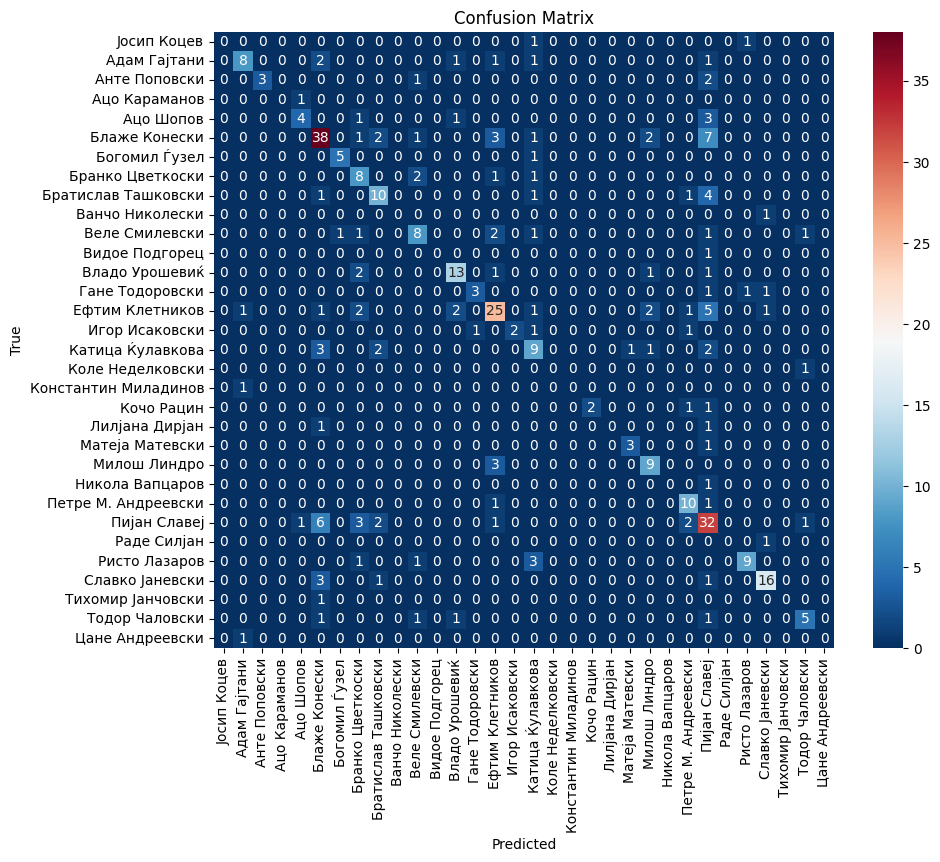

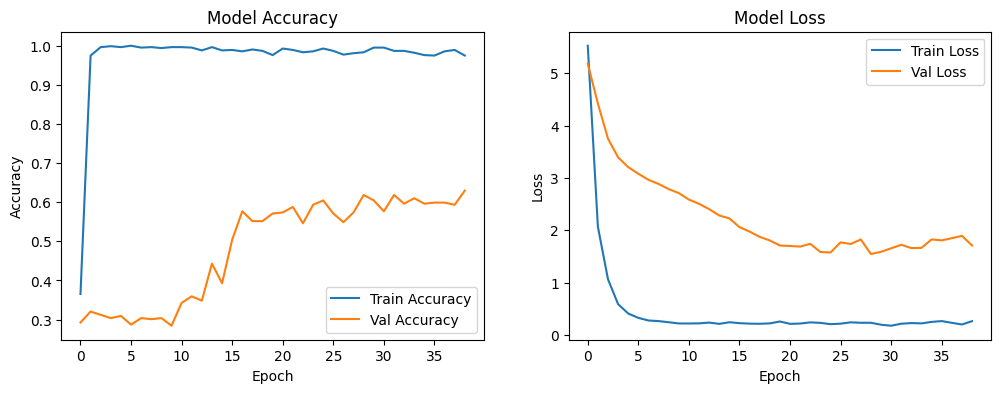

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import logging
import textwrap

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
def preprocess_data(df, test_size=0.3, random_state=47, min_samples=2):

    
    author_counts = df['author'].value_counts()
    valid_authors = author_counts[author_counts >= min_samples].index
    df_filtered = df[df['author'].isin(valid_authors)]
    
    if len(df_filtered) < 2:
        raise ValueError("After filtering, dataset is too small for splitting")
    
    
    train, test = train_test_split(df_filtered, test_size=test_size, random_state=random_state, stratify=df_filtered['author'])
    train_x, train_y = train['song_text'], train['author']
    test_x, test_y = test['song_text'], test['author']
    print(len(train_x))
    print(len(test_x))
    
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
    X_train = vectorizer.fit_transform(train_x).toarray()
    X_test = vectorizer.transform(test_x).toarray()
    
   
    label_encoder = LabelEncoder()
    label_encoder.fit(df_filtered['author'])
    train_y_encoded = label_encoder.transform(train_y)
    mask = test_y.isin(train_y)
    X_test = X_test[mask.values]
    test_y_encoded = label_encoder.transform(test_y[mask])
    
    return X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer

def build_model(input_shape, num_classes, n_layers=1, neurons=256, activation='relu', dropout_rate= 0.12585953325685081, lr= 0.008932202078992958 ):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))
    for _ in range(n_layers):
        model.add(layers.Dense(neurons, activation=activation, kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer = preprocess_data(df)
num_classes = len(label_encoder.classes_)

model = build_model(X_train.shape[1], num_classes, n_layers=1, neurons=256, activation='relu', dropout_rate=0.2, lr=0.001)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=97,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)


y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
f1 = f1_score(test_y_encoded, y_pred, average='weighted')
f1_per_author = f1_score(test_y_encoded, y_pred, average=None)
for author, score in zip(label_encoder.classes_, f1_per_author):
    logger.info(f"{author}: F1 = {score:.4f}")
logger.info(f"Weighted F1 Score: {f1:.4f}")

cm = confusion_matrix(test_y_encoded, y_pred, normalize='true')


num_classes = len(label_encoder.classes_)
figsize = (max(15, num_classes * 0.8), max(12, num_classes * 0.8))  
annot_font_size = max(6, 12 - num_classes * 0.15)  
label_font_size = max(8, 14 - num_classes * 0.15)  


wrapped_labels = [textwrap.fill(label, 15) for label in label_encoder.classes_]


cm = confusion_matrix(test_y_encoded, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu_r",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Using transformer model

INFO:datasets:PyTorch version 2.8.0+cpu available.
INFO:datasets:TensorFlow version 2.20.0 available.
/tmp/ipykernel_20057/387111188.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['song_text'] = df_filtered['song_text'].str.lower()
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2


Training samples: 807, Test samples: 347
Author distribution:
author
Блаже Конески          182
Пијан Славеј           160
Ефтим Клетников        135
Славко Јаневски         70
Владо Урошевиќ          61
Катица Ќулавкова        60
Братислав Ташковски     55
Веле Смилевски          51
Ристо Лазаров           48
Адам Гајтани            47
Бранко Цветкоски        41
Петре М. Андреевски     41
Милош Линдро            40
Тодор Чаловски          31
Ацо Шопов               31
Анте Поповски           21
Гане Тодоровски         19
Богомил Ѓузел           19
Игор Исаковски          15
Матеја Матевски         14
Кочо Рацин              13
Name: count, dtype: int64


Batches: 100%|██████████| 11/11 [00:06<00:00,  1.76it/s]
[I 2025-09-27 12:16:46,256] A new study created in memory with name: no-name-8146d973-b0a6-402c-8185-53d26bc07556
[I 2025-09-27 12:17:23,662] Trial 9 finished with value: 0.06175218867103508 and parameters: {'n_layers': 4, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.3570462514401628, 'optimizer': 'sgd', 'lr': 0.001242979118668881, 'l2_reg': 0.0006516924068238916, 'n_epochs': 14, 'batch_size': 64}. Best is trial 9 with value: 0.06175218867103508.


Trial 9: Mean F1 Score = 0.0618


[I 2025-09-27 12:17:28,135] Trial 6 finished with value: 0.11785608171736728 and parameters: {'n_layers': 5, 'neurons': 512, 'activation': 'tanh', 'dropout_rate': 0.21167131150989926, 'optimizer': 'rmsprop', 'lr': 0.00084746474494889, 'l2_reg': 7.868784558857566e-05, 'n_epochs': 17, 'batch_size': 512}. Best is trial 6 with value: 0.11785608171736728.


Trial 6: Mean F1 Score = 0.1179


[I 2025-09-27 12:17:34,041] Trial 4 finished with value: 0.28337316355536407 and parameters: {'n_layers': 1, 'neurons': 512, 'activation': 'elu', 'dropout_rate': 0.3237436141349562, 'optimizer': 'rmsprop', 'lr': 0.0017239122807252432, 'l2_reg': 0.0007033343430829117, 'n_epochs': 45, 'batch_size': 64}. Best is trial 4 with value: 0.28337316355536407.


Trial 4: Mean F1 Score = 0.2834


[I 2025-09-27 12:17:51,073] Trial 3 finished with value: 0.1263059099412899 and parameters: {'n_layers': 1, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.46880177477625173, 'optimizer': 'adam', 'lr': 0.0007317019838836739, 'l2_reg': 5.8746955494802525e-05, 'n_epochs': 66, 'batch_size': 512}. Best is trial 4 with value: 0.28337316355536407.


Trial 3: Mean F1 Score = 0.1263


[I 2025-09-27 12:17:54,258] Trial 14 finished with value: 0.2250493750137613 and parameters: {'n_layers': 6, 'neurons': 128, 'activation': 'elu', 'dropout_rate': 0.10998875483080708, 'optimizer': 'adam', 'lr': 0.0019742645863112143, 'l2_reg': 0.00011314511043210072, 'n_epochs': 27, 'batch_size': 512}. Best is trial 4 with value: 0.28337316355536407.


Trial 14: Mean F1 Score = 0.2250


[I 2025-09-27 12:17:55,888] Trial 1 finished with value: 0.07090535757122958 and parameters: {'n_layers': 7, 'neurons': 512, 'activation': 'elu', 'dropout_rate': 0.2623564116027617, 'optimizer': 'sgd', 'lr': 0.0013206194357791457, 'l2_reg': 0.006289682905704637, 'n_epochs': 34, 'batch_size': 256}. Best is trial 4 with value: 0.28337316355536407.


Trial 1: Mean F1 Score = 0.0709


[I 2025-09-27 12:17:56,243] Trial 2 finished with value: 0.07970754643321341 and parameters: {'n_layers': 6, 'neurons': 512, 'activation': 'relu', 'dropout_rate': 0.18514191749999012, 'optimizer': 'rmsprop', 'lr': 0.0004000078985481211, 'l2_reg': 0.0001036489248722503, 'n_epochs': 52, 'batch_size': 256}. Best is trial 4 with value: 0.28337316355536407.


Trial 2: Mean F1 Score = 0.0797


[I 2025-09-27 12:18:05,293] Trial 13 finished with value: 0.17859771932465873 and parameters: {'n_layers': 7, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.25355327496473823, 'optimizer': 'adam', 'lr': 0.0008575224262556658, 'l2_reg': 6.508216812809134e-05, 'n_epochs': 91, 'batch_size': 512}. Best is trial 4 with value: 0.28337316355536407.


Trial 13: Mean F1 Score = 0.1786


[I 2025-09-27 12:18:09,005] Trial 15 finished with value: 0.03074723266169328 and parameters: {'n_layers': 2, 'neurons': 256, 'activation': 'relu', 'dropout_rate': 0.49351492552655196, 'optimizer': 'rmsprop', 'lr': 0.00013980965067898204, 'l2_reg': 0.009742117906118158, 'n_epochs': 81, 'batch_size': 512}. Best is trial 4 with value: 0.28337316355536407.


Trial 15: Mean F1 Score = 0.0307


[I 2025-09-27 12:18:18,430] Trial 19 finished with value: 0.025689639762701288 and parameters: {'n_layers': 1, 'neurons': 512, 'activation': 'elu', 'dropout_rate': 0.24369243854335554, 'optimizer': 'sgd', 'lr': 0.00020105188442177087, 'l2_reg': 0.004776220174729752, 'n_epochs': 20, 'batch_size': 512}. Best is trial 4 with value: 0.28337316355536407.


Trial 19: Mean F1 Score = 0.0257


[I 2025-09-27 12:18:18,761] Trial 17 finished with value: 0.2981456477088148 and parameters: {'n_layers': 3, 'neurons': 128, 'activation': 'elu', 'dropout_rate': 0.30774889922461013, 'optimizer': 'adam', 'lr': 0.002993791574136012, 'l2_reg': 1.9510331710787776e-05, 'n_epochs': 61, 'batch_size': 64}. Best is trial 17 with value: 0.2981456477088148.


Trial 17: Mean F1 Score = 0.2981


[I 2025-09-27 12:18:19,104] Trial 18 finished with value: 0.018298158103157047 and parameters: {'n_layers': 5, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.1717337449705969, 'optimizer': 'rmsprop', 'lr': 0.006747901130337106, 'l2_reg': 0.0002229513961484386, 'n_epochs': 26, 'batch_size': 512}. Best is trial 17 with value: 0.2981456477088148.


Trial 18: Mean F1 Score = 0.0183


[I 2025-09-27 12:18:20,213] Trial 10 finished with value: 0.035211105830848737 and parameters: {'n_layers': 5, 'neurons': 128, 'activation': 'relu', 'dropout_rate': 0.25197099539936496, 'optimizer': 'sgd', 'lr': 0.007316420263139351, 'l2_reg': 1.2038348265229098e-05, 'n_epochs': 74, 'batch_size': 512}. Best is trial 17 with value: 0.2981456477088148.


Trial 10: Mean F1 Score = 0.0352


[I 2025-09-27 12:18:38,976] Trial 11 finished with value: 0.05348552238482468 and parameters: {'n_layers': 3, 'neurons': 512, 'activation': 'tanh', 'dropout_rate': 0.2257728162946629, 'optimizer': 'sgd', 'lr': 0.0008940579133246249, 'l2_reg': 6.091094146881233e-05, 'n_epochs': 80, 'batch_size': 128}. Best is trial 17 with value: 0.2981456477088148.


Trial 11: Mean F1 Score = 0.0535


[I 2025-09-27 12:18:45,531] Trial 7 finished with value: 0.035211105830848737 and parameters: {'n_layers': 7, 'neurons': 512, 'activation': 'relu', 'dropout_rate': 0.3959202872430293, 'optimizer': 'sgd', 'lr': 0.004710489193679465, 'l2_reg': 0.0004894005148706099, 'n_epochs': 49, 'batch_size': 64}. Best is trial 17 with value: 0.2981456477088148.


Trial 7: Mean F1 Score = 0.0352


[I 2025-09-27 12:18:50,743] Trial 16 finished with value: 0.04634813631832293 and parameters: {'n_layers': 10, 'neurons': 512, 'activation': 'relu', 'dropout_rate': 0.4396943614216626, 'optimizer': 'sgd', 'lr': 0.006820312122478129, 'l2_reg': 0.0001683651140503736, 'n_epochs': 35, 'batch_size': 512}. Best is trial 17 with value: 0.2981456477088148.


Trial 16: Mean F1 Score = 0.0463


[I 2025-09-27 12:18:54,463] Trial 20 finished with value: 0.013530142859333337 and parameters: {'n_layers': 9, 'neurons': 512, 'activation': 'elu', 'dropout_rate': 0.21052930182914784, 'optimizer': 'sgd', 'lr': 0.0001434968427531023, 'l2_reg': 0.00024014194491806743, 'n_epochs': 15, 'batch_size': 128}. Best is trial 17 with value: 0.2981456477088148.


Trial 20: Mean F1 Score = 0.0135


[I 2025-09-27 12:18:54,729] Trial 5 finished with value: 0.09858372564202701 and parameters: {'n_layers': 9, 'neurons': 128, 'activation': 'relu', 'dropout_rate': 0.39350114248627144, 'optimizer': 'adam', 'lr': 0.0022024970038842, 'l2_reg': 0.000830605531597769, 'n_epochs': 84, 'batch_size': 128}. Best is trial 17 with value: 0.2981456477088148.


Trial 5: Mean F1 Score = 0.0986


[I 2025-09-27 12:18:59,480] Trial 8 finished with value: 0.05714148058120502 and parameters: {'n_layers': 8, 'neurons': 256, 'activation': 'elu', 'dropout_rate': 0.3947261543038021, 'optimizer': 'sgd', 'lr': 0.0005345061866631782, 'l2_reg': 1.760046871659607e-05, 'n_epochs': 83, 'batch_size': 512}. Best is trial 17 with value: 0.2981456477088148.


Trial 8: Mean F1 Score = 0.0571


[I 2025-09-27 12:19:05,636] Trial 22 finished with value: 0.035258653982948945 and parameters: {'n_layers': 1, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.1880371156450311, 'optimizer': 'sgd', 'lr': 0.0013773569414210825, 'l2_reg': 7.824379600179818e-05, 'n_epochs': 61, 'batch_size': 256}. Best is trial 17 with value: 0.2981456477088148.


Trial 22: Mean F1 Score = 0.0353


[I 2025-09-27 12:19:13,125] Trial 26 finished with value: 0.28818996311219475 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.3581336585891449, 'optimizer': 'rmsprop', 'lr': 0.00707182520747131, 'l2_reg': 1.2291014085066858e-05, 'n_epochs': 50, 'batch_size': 64}. Best is trial 17 with value: 0.2981456477088148.


Trial 26: Mean F1 Score = 0.2882


[I 2025-09-27 12:19:13,809] Trial 12 finished with value: 0.31130148821370596 and parameters: {'n_layers': 9, 'neurons': 512, 'activation': 'tanh', 'dropout_rate': 0.19069917738098754, 'optimizer': 'rmsprop', 'lr': 0.00033632716362430446, 'l2_reg': 0.0017034365447435916, 'n_epochs': 57, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 12: Mean F1 Score = 0.3113


[I 2025-09-27 12:19:17,832] Trial 23 finished with value: 0.14257168734552217 and parameters: {'n_layers': 4, 'neurons': 64, 'activation': 'tanh', 'dropout_rate': 0.47664636866339394, 'optimizer': 'adam', 'lr': 0.004618810592952893, 'l2_reg': 9.908147946917066e-05, 'n_epochs': 79, 'batch_size': 512}. Best is trial 12 with value: 0.31130148821370596.
[I 2025-09-27 12:19:17,896] Trial 21 finished with value: 0.02383905388089193 and parameters: {'n_layers': 1, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.24271707967294953, 'optimizer': 'sgd', 'lr': 0.0003536889131678384, 'l2_reg': 0.004631665156081231, 'n_epochs': 52, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 23: Mean F1 Score = 0.1426
Trial 21: Mean F1 Score = 0.0238


[I 2025-09-27 12:19:24,547] Trial 27 finished with value: 0.30432988589933646 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.3550048011592603, 'optimizer': 'adam', 'lr': 0.004381777077966518, 'l2_reg': 1.1078035389668013e-05, 'n_epochs': 50, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 27: Mean F1 Score = 0.3043


[I 2025-09-27 12:19:32,358] Trial 25 finished with value: 0.08266613051510631 and parameters: {'n_layers': 10, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.36616054380752494, 'optimizer': 'rmsprop', 'lr': 0.007569698821085561, 'l2_reg': 1.4005325466462492e-05, 'n_epochs': 44, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 25: Mean F1 Score = 0.0827


[I 2025-09-27 12:19:50,286] Trial 0 finished with value: 0.06530366525054297 and parameters: {'n_layers': 10, 'neurons': 512, 'activation': 'tanh', 'dropout_rate': 0.1073709114437131, 'optimizer': 'sgd', 'lr': 0.00037892793299780633, 'l2_reg': 0.0007001120898718984, 'n_epochs': 93, 'batch_size': 256}. Best is trial 12 with value: 0.31130148821370596.


Trial 0: Mean F1 Score = 0.0653


[I 2025-09-27 12:19:58,753] Trial 31 finished with value: 0.25441005090002816 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.3199847866701867, 'optimizer': 'adam', 'lr': 0.0028219389960959843, 'l2_reg': 0.0017513954098537223, 'n_epochs': 58, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.
[I 2025-09-27 12:19:58,779] Trial 35 finished with value: 0.23023148849970007 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.31066668012880444, 'optimizer': 'rmsprop', 'lr': 0.003204355266586506, 'l2_reg': 0.0016022135345085961, 'n_epochs': 44, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 31: Mean F1 Score = 0.2544
Trial 35: Mean F1 Score = 0.2302


[I 2025-09-27 12:20:04,042] Trial 33 finished with value: 0.2787758155725028 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.32019698171405164, 'optimizer': 'adam', 'lr': 0.003582969821725282, 'l2_reg': 0.002059266415658406, 'n_epochs': 65, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 33: Mean F1 Score = 0.2788


[I 2025-09-27 12:20:04,489] Trial 32 finished with value: 0.26376098717420354 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.31326495326224074, 'optimizer': 'adam', 'lr': 0.0030924595884164467, 'l2_reg': 0.0020876579480821828, 'n_epochs': 61, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 32: Mean F1 Score = 0.2638


[I 2025-09-27 12:20:05,466] Trial 37 finished with value: 0.2639417173143986 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.30433096160699846, 'optimizer': 'rmsprop', 'lr': 0.0046130215374862804, 'l2_reg': 2.5793604459381625e-05, 'n_epochs': 61, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 37: Mean F1 Score = 0.2639


[I 2025-09-27 12:20:06,978] Trial 34 finished with value: 0.26012680939249005 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.31678141686201006, 'optimizer': 'adam', 'lr': 0.002691892567206307, 'l2_reg': 0.0020135550986290786, 'n_epochs': 62, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 34: Mean F1 Score = 0.2601


[I 2025-09-27 12:20:08,128] Trial 36 finished with value: 0.257980018688679 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.3307231244987443, 'optimizer': 'rmsprop', 'lr': 0.003592338498479364, 'l2_reg': 2.559548212941703e-05, 'n_epochs': 44, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 36: Mean F1 Score = 0.2580


[I 2025-09-27 12:20:12,864] Trial 38 finished with value: 0.2693366005063622 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.2982258082842296, 'optimizer': 'rmsprop', 'lr': 0.0034242581771739443, 'l2_reg': 2.586443031671869e-05, 'n_epochs': 61, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 38: Mean F1 Score = 0.2693


[I 2025-09-27 12:20:18,427] Trial 39 finished with value: 0.24055514145112164 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.31228538096601205, 'optimizer': 'rmsprop', 'lr': 0.0026875263412713657, 'l2_reg': 0.002049067288632888, 'n_epochs': 62, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 39: Mean F1 Score = 0.2406


[I 2025-09-27 12:20:28,224] Trial 28 finished with value: 0.13469231108717483 and parameters: {'n_layers': 10, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.35960115471872833, 'optimizer': 'adam', 'lr': 0.003590686504541883, 'l2_reg': 0.0009470802538611835, 'n_epochs': 50, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 28: Mean F1 Score = 0.1347


[I 2025-09-27 12:20:29,363] Trial 40 finished with value: 0.26600142791756554 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.30093806087010966, 'optimizer': 'adam', 'lr': 0.0030449264302471416, 'l2_reg': 0.002009981312457162, 'n_epochs': 64, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 40: Mean F1 Score = 0.2660


[I 2025-09-27 12:20:30,590] Trial 41 finished with value: 0.28920126832052556 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.32317597490463973, 'optimizer': 'adam', 'lr': 0.0031411024470276504, 'l2_reg': 2.966221676172719e-05, 'n_epochs': 64, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 41: Mean F1 Score = 0.2892


[I 2025-09-27 12:20:34,648] Trial 45 finished with value: 0.28809849916231484 and parameters: {'n_layers': 2, 'neurons': 256, 'activation': 'elu', 'dropout_rate': 0.2918331144634021, 'optimizer': 'adam', 'lr': 0.009959306595767648, 'l2_reg': 2.718399638361958e-05, 'n_epochs': 71, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.
[I 2025-09-27 12:20:34,843] Trial 24 finished with value: 0.035211105830848737 and parameters: {'n_layers': 10, 'neurons': 512, 'activation': 'relu', 'dropout_rate': 0.2052273932720171, 'optimizer': 'sgd', 'lr': 0.00018716720104189726, 'l2_reg': 2.9447917297740893e-05, 'n_epochs': 62, 'batch_size': 128}. Best is trial 12 with value: 0.31130148821370596.


Trial 45: Mean F1 Score = 0.2881
Trial 24: Mean F1 Score = 0.0352


[I 2025-09-27 12:20:37,742] Trial 47 finished with value: 0.25234498875446865 and parameters: {'n_layers': 2, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.35002957010162616, 'optimizer': 'rmsprop', 'lr': 0.00901513924500955, 'l2_reg': 3.151393189344319e-05, 'n_epochs': 70, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.
[I 2025-09-27 12:20:37,911] Trial 46 finished with value: 0.2668992614317948 and parameters: {'n_layers': 2, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.2841283781286183, 'optimizer': 'rmsprop', 'lr': 0.00934008654724561, 'l2_reg': 3.0838124351629314e-05, 'n_epochs': 70, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 47: Mean F1 Score = 0.2523
Trial 46: Mean F1 Score = 0.2669


[I 2025-09-27 12:20:39,726] Trial 42 finished with value: 0.2858800735923787 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.31024806964660223, 'optimizer': 'adam', 'lr': 0.0035015969286079688, 'l2_reg': 2.3964247943984696e-05, 'n_epochs': 62, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 42: Mean F1 Score = 0.2859


[I 2025-09-27 12:20:40,431] Trial 30 finished with value: 0.20444097673269956 and parameters: {'n_layers': 9, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.3286365817250194, 'optimizer': 'adam', 'lr': 0.0031719596299872354, 'l2_reg': 0.0014161679436172168, 'n_epochs': 41, 'batch_size': 64}. Best is trial 12 with value: 0.31130148821370596.


Trial 30: Mean F1 Score = 0.2044


[I 2025-09-27 12:20:41,104] Trial 44 finished with value: 0.31173051005842356 and parameters: {'n_layers': 2, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.28945032015407335, 'optimizer': 'adam', 'lr': 0.0042635985396110975, 'l2_reg': 3.14420091888157e-05, 'n_epochs': 69, 'batch_size': 64}. Best is trial 44 with value: 0.31173051005842356.


Trial 44: Mean F1 Score = 0.3117


[I 2025-09-27 12:20:41,708] Trial 43 finished with value: 0.28009767040359124 and parameters: {'n_layers': 4, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.3013700675706443, 'optimizer': 'adam', 'lr': 0.0033859186048899596, 'l2_reg': 3.1939239913432565e-05, 'n_epochs': 72, 'batch_size': 64}. Best is trial 44 with value: 0.31173051005842356.


Trial 43: Mean F1 Score = 0.2801


[I 2025-09-27 12:20:42,725] Trial 29 finished with value: 0.18788133679655483 and parameters: {'n_layers': 10, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.3527641324855018, 'optimizer': 'adam', 'lr': 0.002408154141376822, 'l2_reg': 0.001247880317742077, 'n_epochs': 48, 'batch_size': 64}. Best is trial 44 with value: 0.31173051005842356.


Trial 29: Mean F1 Score = 0.1879


[I 2025-09-27 12:20:47,885] Trial 49 finished with value: 0.1561588694701074 and parameters: {'n_layers': 2, 'neurons': 256, 'activation': 'elu', 'dropout_rate': 0.28343329842682435, 'optimizer': 'rmsprop', 'lr': 0.0003000973287345298, 'l2_reg': 3.400476335670937e-05, 'n_epochs': 70, 'batch_size': 256}. Best is trial 44 with value: 0.31173051005842356.


Trial 49: Mean F1 Score = 0.1562


[I 2025-09-27 12:20:49,463] Trial 48 finished with value: 0.15046020570637308 and parameters: {'n_layers': 2, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.2774081208515147, 'optimizer': 'rmsprop', 'lr': 0.00023348958415552316, 'l2_reg': 2.578636985065346e-05, 'n_epochs': 71, 'batch_size': 64}. Best is trial 44 with value: 0.31173051005842356.


Trial 48: Mean F1 Score = 0.1505
Best F1 Score: 0.31173051005842356
Best hyperparameters: {'n_layers': 2, 'neurons': 64, 'activation': 'elu', 'dropout_rate': 0.28945032015407335, 'optimizer': 'adam', 'lr': 0.0042635985396110975, 'l2_reg': 3.14420091888157e-05, 'n_epochs': 69, 'batch_size': 64}
Epoch 1/69
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1264 - loss: 2.8785 - val_accuracy: 0.1585 - val_loss: 2.7152
Epoch 2/69
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2032 - loss: 2.6883 - val_accuracy: 0.1844 - val_loss: 2.6207
Epoch 3/69
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2243 - loss: 2.5776 - val_accuracy: 0.2334 - val_loss: 2.5228
Epoch 4/69
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2553 - loss: 2.4769 - val_accuracy: 0.2334 - val_loss: 2.4433
Epoch 5/69
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2701 - loss: 2.3676 - val_accuracy: 0.2622 - val_loss: 2.3628
Epoch 6/69
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3011 - los

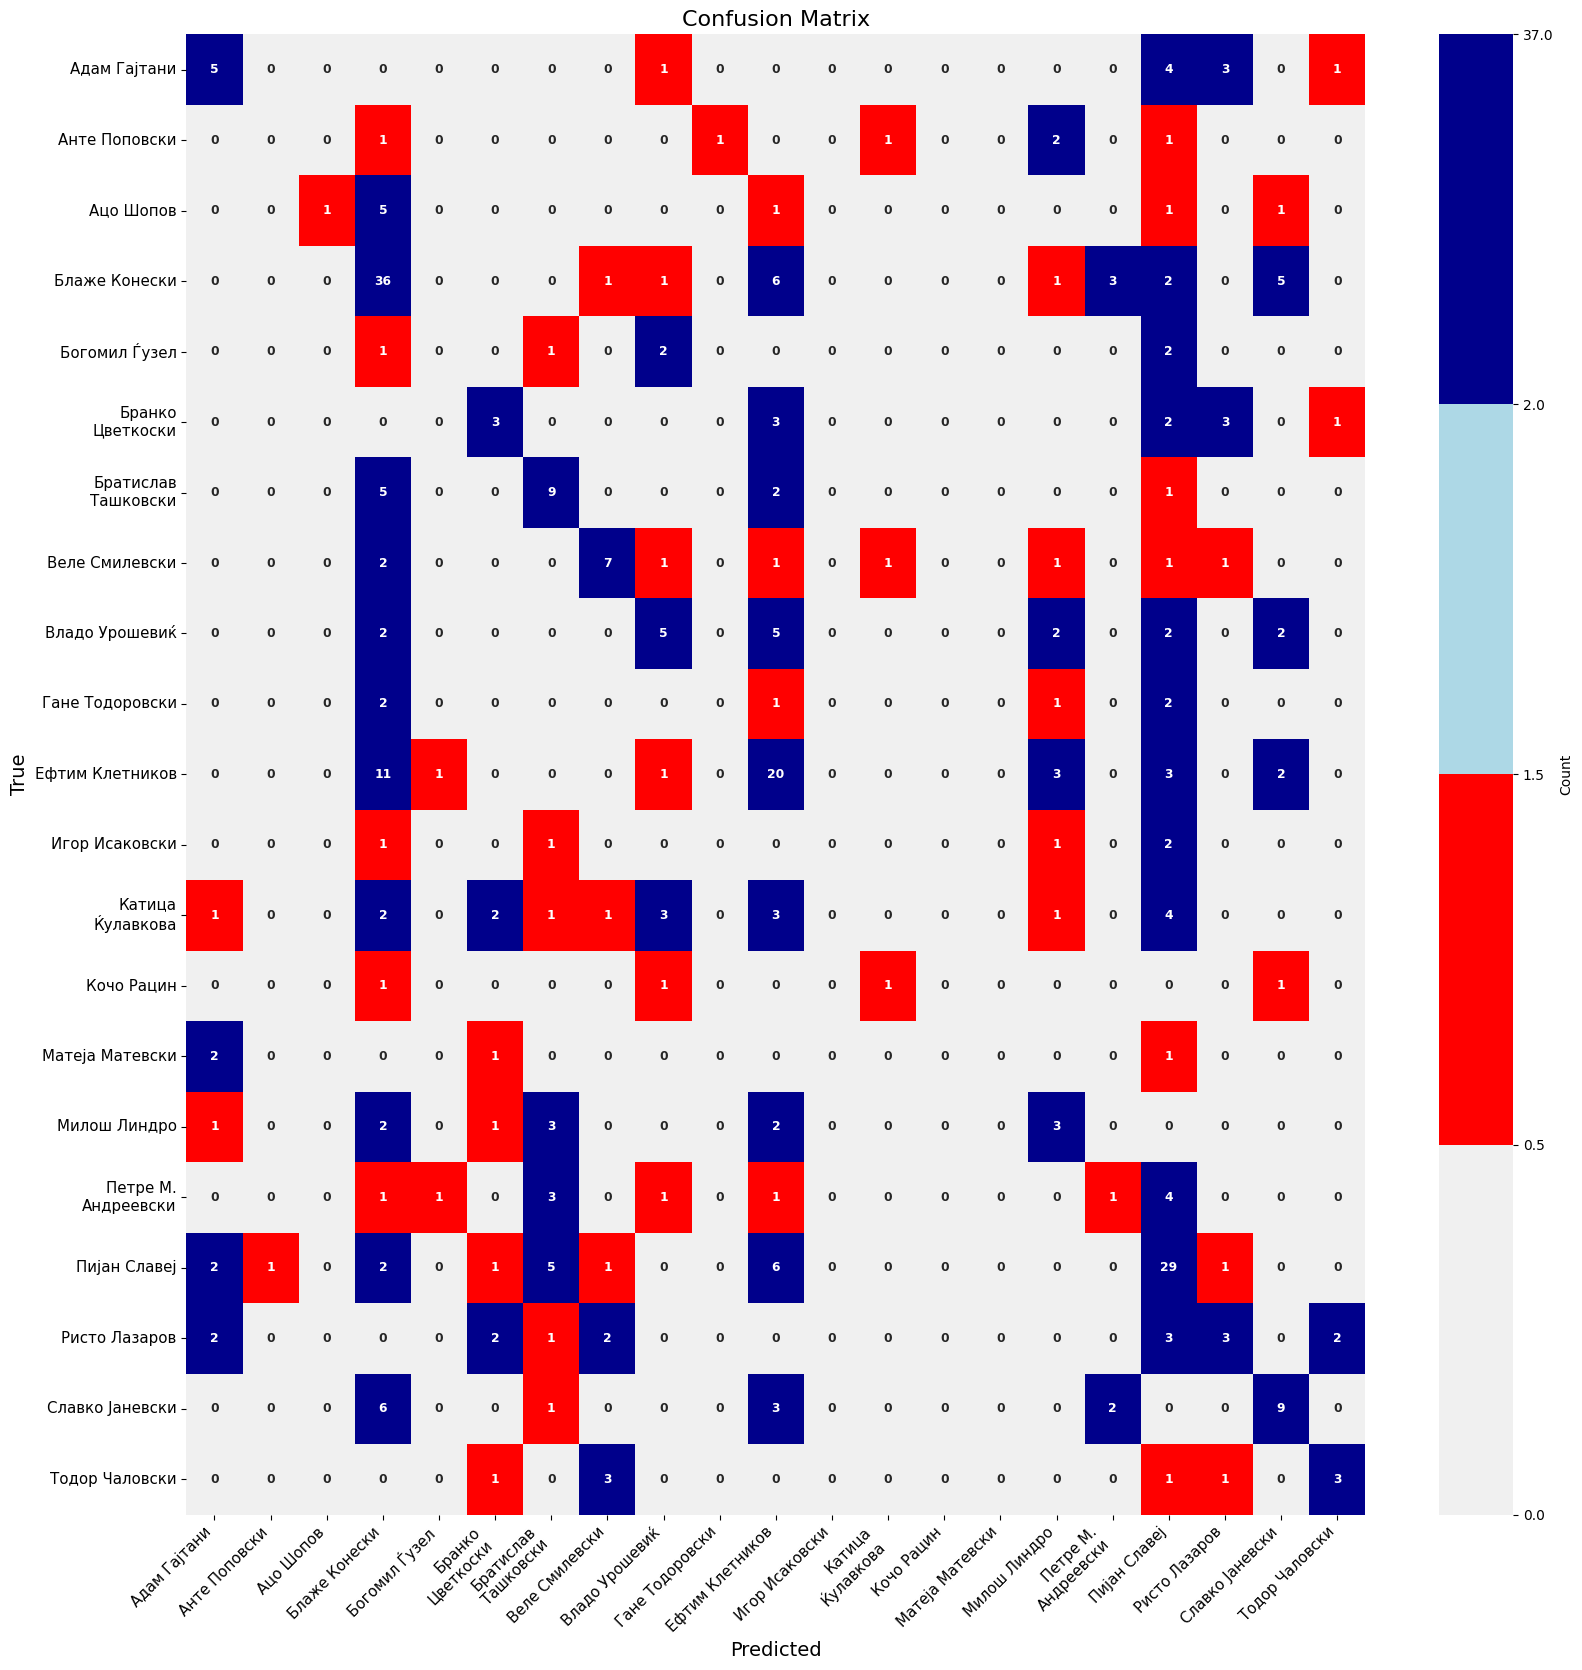

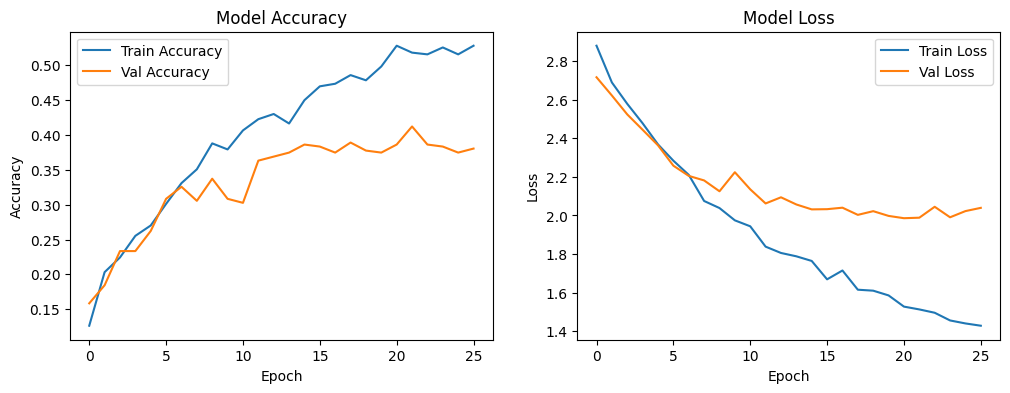

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.colors import ListedColormap, BoundaryNorm
from sentence_transformers import SentenceTransformer

def preprocess_data(df, test_size=0.3, random_state=47, min_samples=10):
    # Filter authors with at least min_samples
    author_counts = df['author'].value_counts()
    valid_authors = author_counts[author_counts >= min_samples].index
    df_filtered = df[df['author'].isin(valid_authors)]
    df_filtered['song_text'] = df_filtered['song_text'].str.lower()
    
    if len(df_filtered) < 2:
        raise ValueError("After filtering, dataset is too small for splitting")
    
    # Stratified train-test split
    train, test = train_test_split(df_filtered, test_size=test_size, random_state=random_state, stratify=df_filtered['author'])
    train_x, train_y = train['song_text'], train['author']
    test_x, test_y = test['song_text'], test['author']
    print(f"Training samples: {len(train_x)}, Test samples: {len(test_x)}")
    print(f"Author distribution:\n{author_counts[valid_authors]}")
    
    # Initialize SentenceTransformer
    model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", device='cpu')
    
    # Generate embeddings
    X_train = model.encode(train_x.tolist(), convert_to_tensor=False, normalize_embeddings=True)
    X_test = model.encode(test_x.tolist(), convert_to_tensor=False, normalize_embeddings=True)
    
    # Label encoding
    label_encoder = LabelEncoder()
    label_encoder.fit(df_filtered['author'])
    train_y_encoded = label_encoder.transform(train_y)
    mask = test_y.isin(train_y)
    X_test = X_test[mask]
    test_y = test_y[mask]
    test_y_encoded = label_encoder.transform(test_y)
    
    return X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, model

def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 10)
    neurons = trial.suggest_categorical("neurons", [64, 128, 256, 512])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    l2_reg = trial.suggest_float("l2_reg", 1e-5, 1e-2, log=True)
    n_epochs = trial.suggest_int("n_epochs", 10, 100)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256, 512])
    
    n_folds = 3
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=47)
    f1_scores = []

    for train_idx, val_idx in kf.split(X_train, train_y_encoded):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = train_y_encoded[train_idx], train_y_encoded[val_idx]

        model = keras.Sequential()
        model.add(layers.Input(shape=(X_train.shape[1],)))
        for _ in range(n_layers):
            model.add(layers.Dense(neurons, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(num_classes, activation="softmax"))

        if optimizer_name == "adam":
            optimizer = keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_name == "rmsprop":
            optimizer = keras.optimizers.RMSprop(learning_rate=lr)
        else:
            optimizer = keras.optimizers.SGD(learning_rate=lr)

        model.compile(
            optimizer=optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
        )

        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )

        model.fit(
            X_tr, y_tr,
            validation_data=(X_val, y_val),
            epochs=n_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=0
        )

        y_pred = np.argmax(model.predict(X_val, verbose=0), axis=1)
        f1 = f1_score(y_val, y_pred, average="weighted")
        f1_scores.append(f1)

    print(f"Trial {trial.number}: Mean F1 Score = {np.mean(f1_scores):.4f}")
    return np.mean(f1_scores)

# Preprocess data
X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, model = preprocess_data(df)
num_classes = len(label_encoder.classes_)

# Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best F1 Score:", study.best_value)
print("Best hyperparameters:", study.best_params)

# Train final model
best_params = study.best_params
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
for _ in range(best_params['n_layers']):
    model.add(layers.Dense(best_params['neurons'], activation=best_params['activation'], kernel_regularizer=regularizers.l2(best_params['l2_reg'])))
    model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.Dense(num_classes, activation="softmax"))

if best_params['optimizer'] == "adam":
    optimizer = keras.optimizers.Adam(learning_rate=best_params['lr'])
elif best_params['optimizer'] == "rmsprop":
    optimizer = keras.optimizers.RMSprop(learning_rate=best_params['lr'])
else:
    optimizer = keras.optimizers.SGD(learning_rate=best_params['lr'])

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=best_params['n_epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[early_stopping],
    verbose=1
)

# Confusion matrix with custom colormap
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
cm = confusion_matrix(test_y_encoded, y_pred)  # Raw counts for visualization

num_classes = len(label_encoder.classes_)
figsize = (max(15, num_classes * 0.8), max(12, num_classes * 0.8))
annot_font_size = max(6, 12 - num_classes * 0.15)
label_font_size = max(8, 14 - num_classes * 0.15)
wrapped_labels = [textwrap.fill(label, 15) for label in label_encoder.classes_]

colors = ['#F0F0F0', '#FF0000', '#ADD8E6', '#00008B']  # 0: gray, 1: red, 2: light blue, 3+: dark blue
boundaries = [0, 0.5, 1.5, 2, np.max(cm) + 1]
cmap = ListedColormap(colors)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

plt.figure(figsize=figsize)
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, norm=norm,
            xticklabels=wrapped_labels,
            yticklabels=wrapped_labels,
            annot_kws={"size": annot_font_size, "weight": "bold"},
            cbar_kws={'label': 'Count'})
plt.xticks(rotation=45, ha='right', fontsize=label_font_size)
plt.yticks(rotation=0, fontsize=label_font_size)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Training history plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()